<a href="https://colab.research.google.com/github/YomnaElmousalami/AppleHealthData_Analysis/blob/main/Analyze_Sis_Iphone_health_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Instead of being a fatass, lets explore my sisters apple watch data so I can be more like her!

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
!pip install openpyxl

In [3]:
import pandas as pd
import xml.etree.ElementTree as ET
import os
from bs4 import BeautifulSoup
import dask.dataframe as dd
import matplotlib.pyplot as plt
import numpy as np

#Analyze the content in this folder

In [4]:
folder = "/content/drive/MyDrive/apple_health_export"
directory_files = os.listdir(folder)
for i in directory_files:
  print(i)

export.xml
electrocardiograms
export_cda.xml
workout-routes


#Work on the first file

In [5]:
file_1 = "/content/drive/MyDrive/apple_health_export/export.xml"

In [6]:
tree = ET.parse(file_1)
root = tree.getroot()

In [8]:
# Function to extract attributes as DataFrame
def extract_data(tag):
    data = []
    for elem in root.findall(tag):
        data.append(elem.attrib)
    return pd.DataFrame(data)

# Extract tables
export_date_df = extract_data("ExportDate")
me_df = extract_data("Me")
records_df = extract_data("Record")
workouts_df = extract_data("Workout")
activity_summary_df = extract_data("ActivitySummary")

Make sure every table is displayed

In [9]:
records_df

,type,sourceName,sourceVersion,unit,creationDate,startDate,endDate,value,device
0,HKQuantityTypeIdentifierHeight,iPhone (2),16.6.1,ft,2023-09-17 10:41:20 -0500,2023-09-17 10:41:20 -0500,2023-09-17 10:41:20 -0500,5.25,NaN
1,HKQuantityTypeIdentifierHeight,Jannah’s Apple Watch,9.3,ft,2023-09-17 16:11:26 -0500,2023-09-17 16:11:26 -0500,2023-09-17 16:11:26 -0500,5.25,NaN
2,HKQuantityTypeIdentifierBodyMass,Health,11.2.6,lb,2018-04-01 13:08:42 -0500,2018-04-01 13:08:00 -0500,2018-04-01 13:08:00 -0500,120,NaN
3,HKQuantityTypeIdentifierBodyMass,Health,11.2.6,lb,2018-04-03 19:11:31 -0500,2018-04-03 19:11:00 -0500,2018-04-03 19:11:00 -0500,120,NaN
4,HKQuantityTypeIdentifierBodyMass,Health,11.2.6,lb,2018-04-05 21:03:57 -0500,2018-04-05 21:03:00 -0500,2018-04-05 21:03:00 -0500,120,NaN
...,...,...,...,...,...,...,...,...,...
911267,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,Jannah’s Apple Watch,11.0,ms,2025-02-25 21:29:58 -0500,2025-02-25 21:28:57 -0500,2025-02-25 21:29:54 -0500,144.231,"<<HKDevice: 0x30186d040>, name:Apple Watch, ma..."
911268,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,Jannah’s Apple Watch,11.0,ms,2025-02-26 06:45:04 -0500,2025-02-26 06:44:03 -0500,2025-02-26 06:45:03 -0500,120.072,"<<HKDevice: 0x30186d040>, name:Apple Watch, ma..."
911269,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,Jannah’s Apple Watch,11.0,ms,2025-02-26 07:57:41 -0500,2025-02-26 07:56:40 -0500,2025-02-26 07:57:39 -0500,38.8269,"<<HKDevice: 0x30186d040>, name:Apple Watch, ma..."
911270,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,Jannah’s Apple Watch,11.0,ms,2025-02-26 13:43:06 -0500,2025-02-26 13:42:05 -0500,2025-02-26 13:43:04 -0500,39.7098,"<<HKDevice: 0x30186d040>, name:Apple Watch, ma..."


In [10]:
records_df.loc[records_df['sourceName'] == "iPhone (2)"]

,type,sourceName,sourceVersion,unit,creationDate,startDate,endDate,value,device
0,HKQuantityTypeIdentifierHeight,iPhone (2),16.6.1,ft,2023-09-17 10:41:20 -0500,2023-09-17 10:41:20 -0500,2023-09-17 10:41:20 -0500,5.25,NaN
10,HKQuantityTypeIdentifierBodyMass,iPhone (2),16.0,lb,2022-09-20 09:55:06 -0500,2022-09-20 09:55:06 -0500,2022-09-20 09:55:06 -0500,110,NaN
11,HKQuantityTypeIdentifierBodyMass,iPhone (2),16.6.1,lb,2023-09-17 10:41:20 -0500,2023-09-17 10:41:20 -0500,2023-09-17 10:41:20 -0500,110,NaN
133140,HKQuantityTypeIdentifierStepCount,iPhone (2),13.4.1,count,2021-01-23 13:16:51 -0500,2021-01-23 13:06:18 -0500,2021-01-23 13:10:23 -0500,48,"<<HKDevice: 0x3018d51d0>, name:iPhone, manufac..."
133141,HKQuantityTypeIdentifierStepCount,iPhone (2),13.4.1,count,2021-01-23 15:31:03 -0500,2021-01-23 15:20:00 -0500,2021-01-23 15:29:14 -0500,23,"<<HKDevice: 0x3018d51d0>, name:iPhone, manufac..."
...,...,...,...,...,...,...,...,...,...
900239,HKCategoryTypeIdentifierSleepAnalysis,iPhone (2),17.6.1,NaN,2024-10-28 05:00:23 -0500,2024-10-27 22:30:38 -0500,2024-10-28 05:00:22 -0500,HKCategoryValueSleepAnalysisInBed,NaN
903662,HKCategoryTypeIdentifierAppleStandHour,iPhone (2),17.2.1,NaN,2024-02-15 16:20:50 -0500,2024-02-15 15:00:00 -0500,2024-02-15 16:00:00 -0500,HKCategoryValueAppleStandHourStood,NaN
906341,HKCategoryTypeIdentifierAppleStandHour,iPhone (2),17.5.1,NaN,2024-07-04 16:20:48 -0500,2024-07-04 14:00:00 -0500,2024-07-04 15:00:00 -0500,HKCategoryValueAppleStandHourStood,NaN
906342,HKCategoryTypeIdentifierAppleStandHour,iPhone (2),17.5.1,NaN,2024-07-04 16:21:12 -0500,2024-07-04 14:00:00 -0500,2024-07-04 15:00:00 -0500,HKCategoryValueAppleStandHourStood,NaN


In [11]:
records_df.loc[records_df['sourceName'] == "iPhone"]

,type,sourceName,sourceVersion,unit,creationDate,startDate,endDate,value,device
102992,HKQuantityTypeIdentifierStepCount,iPhone,11.2.6,count,2018-02-20 21:23:38 -0500,2018-02-20 21:06:51 -0500,2018-02-20 21:16:15 -0500,55,"<<HKDevice: 0x301825810>, name:iPhone, manufac..."
102993,HKQuantityTypeIdentifierStepCount,iPhone,11.2.6,count,2018-02-21 14:51:45 -0500,2018-02-21 07:35:04 -0500,2018-02-21 07:38:28 -0500,8,"<<HKDevice: 0x301825810>, name:iPhone, manufac..."
102994,HKQuantityTypeIdentifierStepCount,iPhone,11.2.6,count,2018-02-21 15:47:20 -0500,2018-02-21 14:44:13 -0500,2018-02-21 14:53:54 -0500,24,"<<HKDevice: 0x301825810>, name:iPhone, manufac..."
102995,HKQuantityTypeIdentifierStepCount,iPhone,11.2.6,count,2018-02-21 15:47:20 -0500,2018-02-21 14:53:54 -0500,2018-02-21 15:03:35 -0500,266,"<<HKDevice: 0x301825810>, name:iPhone, manufac..."
102996,HKQuantityTypeIdentifierStepCount,iPhone,11.2.6,count,2018-02-21 15:47:20 -0500,2018-02-21 15:03:35 -0500,2018-02-21 15:13:25 -0500,44,"<<HKDevice: 0x301825810>, name:iPhone, manufac..."
...,...,...,...,...,...,...,...,...,...
224884,HKQuantityTypeIdentifierDistanceWalkingRunning,iPhone,14.2,mi,2021-01-04 15:53:25 -0500,2021-01-04 15:42:25 -0500,2021-01-04 15:42:25 -0500,0.00961883,"<<HKDevice: 0x3018d47d0>, name:iPhone, manufac..."
224885,HKQuantityTypeIdentifierDistanceWalkingRunning,iPhone,14.2,mi,2021-01-04 16:19:25 -0500,2021-01-04 16:08:22 -0500,2021-01-04 16:15:27 -0500,0.00997922,"<<HKDevice: 0x3018d47d0>, name:iPhone, manufac..."
224886,HKQuantityTypeIdentifierDistanceWalkingRunning,iPhone,14.2,mi,2021-01-04 16:59:50 -0500,2021-01-04 16:46:54 -0500,2021-01-04 16:46:59 -0500,0.00560477,"<<HKDevice: 0x3018d47d0>, name:iPhone, manufac..."
224887,HKQuantityTypeIdentifierDistanceWalkingRunning,iPhone,14.2,mi,2021-01-04 18:06:36 -0500,2021-01-04 17:47:23 -0500,2021-01-04 17:55:27 -0500,0.00859978,"<<HKDevice: 0x3018d47d0>, name:iPhone, manufac..."


In [12]:
records_df['device'].loc[102992]

'<<HKDevice: 0x301825810>, name:iPhone, manufacturer:Apple, model:iPhone, hardware:iPhone8,4, software:11.2.6, creation date:2018-02-21 01:23:27 +0000>'

In [13]:
records_df['device'].loc[133140]

'<<HKDevice: 0x3018d51d0>, name:iPhone, manufacturer:Apple Inc., model:iPhone, hardware:iPhone12,8, software:13.4.1, creation date:2021-01-23 18:00:29 +0000>'

In [14]:
workouts_df

,workoutActivityType,duration,durationUnit,sourceName,sourceVersion,creationDate,startDate,endDate,device
0,HKWorkoutActivityTypeOther,0,min,Health,11.3.1,2018-06-29 14:38:15 -0500,2018-06-29 14:37:00 -0500,2018-06-29 14:37:00 -0500,NaN
1,HKWorkoutActivityTypeWalking,34.62768211166064,min,Jannah’s Apple Watch,9.3,2023-09-17 17:26:39 -0500,2023-09-17 16:51:58 -0500,2023-09-17 17:26:35 -0500,"<<HKDevice: 0x30186e5d0>, name:Apple Watch, ma..."
2,HKWorkoutActivityTypeRunning,17.38285479942958,min,Jannah’s Apple Watch,9.3,2023-09-18 18:24:44 -0500,2023-09-18 18:07:19 -0500,2023-09-18 18:24:42 -0500,"<<HKDevice: 0x30186e5d0>, name:Apple Watch, ma..."
3,HKWorkoutActivityTypeRunning,11.51686753034592,min,Jannah’s Apple Watch,9.3,2023-09-21 15:01:49 -0500,2023-09-21 14:50:17 -0500,2023-09-21 15:01:48 -0500,"<<HKDevice: 0x30186e5d0>, name:Apple Watch, ma..."
4,HKWorkoutActivityTypeSwimming,6.07142174243927,min,Jannah’s Apple Watch,9.3,2023-09-26 15:56:23 -0500,2023-09-26 15:50:18 -0500,2023-09-26 15:56:22 -0500,"<<HKDevice: 0x30186e5d0>, name:Apple Watch, ma..."
...,...,...,...,...,...,...,...,...,...
241,HKWorkoutActivityTypeRunning,9.06705576578776,min,Jannah’s Apple Watch,10.6.1,2024-10-29 19:13:03 -0500,2024-10-29 19:03:58 -0500,2024-10-29 19:13:02 -0500,"<<HKDevice: 0x301810280>, name:Apple Watch, ma..."
242,HKWorkoutActivityTypeCooldown,28.62752670049667,min,Jannah’s Apple Watch,10.6.1,2024-10-29 19:41:48 -0500,2024-10-29 19:13:09 -0500,2024-10-29 19:41:47 -0500,"<<HKDevice: 0x301810280>, name:Apple Watch, ma..."
243,HKWorkoutActivityTypeSwimming,77.92724243203799,min,Jannah’s Apple Watch,11.0,2025-01-31 16:35:38 -0500,2025-01-31 15:17:39 -0500,2025-01-31 16:35:35 -0500,"<<HKDevice: 0x301800e10>, name:Apple Watch, ma..."
244,HKWorkoutActivityTypeSwimming,62.294687606891,min,Jannah’s Apple Watch,11.0,2025-02-03 16:31:21 -0500,2025-02-03 15:29:01 -0500,2025-02-03 16:31:19 -0500,"<<HKDevice: 0x301800e10>, name:Apple Watch, ma..."


In [15]:
activity_summary_df

,dateComponents,activeEnergyBurned,activeEnergyBurnedGoal,activeEnergyBurnedUnit,appleMoveTime,appleMoveTimeGoal,appleExerciseTime,appleExerciseTimeGoal,appleStandHours,appleStandHoursGoal
0,2022-09-20,79.454,240,Cal,0,0,0,0,0,0
1,2022-09-21,92.923,240,Cal,0,0,0,0,0,0
2,2022-09-22,151.574,240,Cal,0,0,0,0,0,0
3,2022-09-23,61.259,240,Cal,0,0,0,0,0,0
4,2022-09-24,62.416,240,Cal,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
797,2025-02-22,290.453,270,Cal,0,0,9,20,16,12
798,2025-02-23,250.286,270,Cal,0,0,5,20,13,12
799,2025-02-24,302.848,270,Cal,0,0,8,20,18,12
800,2025-02-25,255.962,270,Cal,0,0,11,20,14,12


**Analyze records_df**

In [16]:
records_df.head()

,type,sourceName,sourceVersion,unit,creationDate,startDate,endDate,value,device
0,HKQuantityTypeIdentifierHeight,iPhone (2),16.6.1,ft,2023-09-17 10:41:20 -0500,2023-09-17 10:41:20 -0500,2023-09-17 10:41:20 -0500,5.25,NaN
1,HKQuantityTypeIdentifierHeight,Jannah’s Apple Watch,9.3,ft,2023-09-17 16:11:26 -0500,2023-09-17 16:11:26 -0500,2023-09-17 16:11:26 -0500,5.25,NaN
2,HKQuantityTypeIdentifierBodyMass,Health,11.2.6,lb,2018-04-01 13:08:42 -0500,2018-04-01 13:08:00 -0500,2018-04-01 13:08:00 -0500,120,NaN
3,HKQuantityTypeIdentifierBodyMass,Health,11.2.6,lb,2018-04-03 19:11:31 -0500,2018-04-03 19:11:00 -0500,2018-04-03 19:11:00 -0500,120,NaN
4,HKQuantityTypeIdentifierBodyMass,Health,11.2.6,lb,2018-04-05 21:03:57 -0500,2018-04-05 21:03:00 -0500,2018-04-05 21:03:00 -0500,120,NaN


In [17]:
records_df['type'].unique()

array(['HKQuantityTypeIdentifierHeight',
       'HKQuantityTypeIdentifierBodyMass',
       'HKQuantityTypeIdentifierHeartRate',
       'HKQuantityTypeIdentifierRespiratoryRate',
       'HKQuantityTypeIdentifierStepCount',
       'HKQuantityTypeIdentifierDistanceWalkingRunning',
       'HKQuantityTypeIdentifierBasalEnergyBurned',
       'HKQuantityTypeIdentifierActiveEnergyBurned',
       'HKQuantityTypeIdentifierFlightsClimbed',
       'HKQuantityTypeIdentifierAppleExerciseTime',
       'HKQuantityTypeIdentifierDistanceCycling',
       'HKQuantityTypeIdentifierDistanceSwimming',
       'HKQuantityTypeIdentifierSwimmingStrokeCount',
       'HKQuantityTypeIdentifierRestingHeartRate',
       'HKQuantityTypeIdentifierVO2Max',
       'HKQuantityTypeIdentifierWalkingHeartRateAverage',
       'HKQuantityTypeIdentifierEnvironmentalAudioExposure',
       'HKQuantityTypeIdentifierHeadphoneAudioExposure',
       'HKQuantityTypeIdentifierWalkingDoubleSupportPercentage',
       'HKQuantityTypeIdent

In [18]:
records_df.duplicated(keep = 'first')

,0
0,False
1,False
2,False
3,False
4,False
...,...
911267,False
911268,False
911269,False
911270,False


#OK no duplicates

In [19]:
records_df.isnull().sum()

,0
type,0
sourceName,0
sourceVersion,56
unit,20074
creationDate,0
startDate,0
endDate,0
value,0
device,203031


In [20]:
df_expanded = records_df['device'].str.extract(r'hardware:([\w\d,]+)')
df_expanded = df_expanded[0].str.rstrip(',')
df_expanded

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
911267,"Watch6,10"
911268,"Watch6,10"
911269,"Watch6,10"
911270,"Watch6,10"


In [21]:
df_expanded = df_expanded.to_frame(name='d_Type')
df_expanded

,d_Type
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
911267,"Watch6,10"
911268,"Watch6,10"
911269,"Watch6,10"
911270,"Watch6,10"


In [22]:
df_expanded['d_Type'].unique()

array([nan, 'Watch6,14', 'Watch6,10', 'iPhone8,4', 'iPhone6,1',
       'iPhone12,8'], dtype=object)

#Replace current device column with new one from a dataframe.

In [23]:
records_df = records_df.join(df_expanded)
records_df

,type,sourceName,sourceVersion,unit,creationDate,startDate,endDate,value,device,d_Type
0,HKQuantityTypeIdentifierHeight,iPhone (2),16.6.1,ft,2023-09-17 10:41:20 -0500,2023-09-17 10:41:20 -0500,2023-09-17 10:41:20 -0500,5.25,NaN,NaN
1,HKQuantityTypeIdentifierHeight,Jannah’s Apple Watch,9.3,ft,2023-09-17 16:11:26 -0500,2023-09-17 16:11:26 -0500,2023-09-17 16:11:26 -0500,5.25,NaN,NaN
2,HKQuantityTypeIdentifierBodyMass,Health,11.2.6,lb,2018-04-01 13:08:42 -0500,2018-04-01 13:08:00 -0500,2018-04-01 13:08:00 -0500,120,NaN,NaN
3,HKQuantityTypeIdentifierBodyMass,Health,11.2.6,lb,2018-04-03 19:11:31 -0500,2018-04-03 19:11:00 -0500,2018-04-03 19:11:00 -0500,120,NaN,NaN
4,HKQuantityTypeIdentifierBodyMass,Health,11.2.6,lb,2018-04-05 21:03:57 -0500,2018-04-05 21:03:00 -0500,2018-04-05 21:03:00 -0500,120,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
911267,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,Jannah’s Apple Watch,11.0,ms,2025-02-25 21:29:58 -0500,2025-02-25 21:28:57 -0500,2025-02-25 21:29:54 -0500,144.231,"<<HKDevice: 0x30186d040>, name:Apple Watch, ma...","Watch6,10"
911268,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,Jannah’s Apple Watch,11.0,ms,2025-02-26 06:45:04 -0500,2025-02-26 06:44:03 -0500,2025-02-26 06:45:03 -0500,120.072,"<<HKDevice: 0x30186d040>, name:Apple Watch, ma...","Watch6,10"
911269,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,Jannah’s Apple Watch,11.0,ms,2025-02-26 07:57:41 -0500,2025-02-26 07:56:40 -0500,2025-02-26 07:57:39 -0500,38.8269,"<<HKDevice: 0x30186d040>, name:Apple Watch, ma...","Watch6,10"
911270,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,Jannah’s Apple Watch,11.0,ms,2025-02-26 13:43:06 -0500,2025-02-26 13:42:05 -0500,2025-02-26 13:43:04 -0500,39.7098,"<<HKDevice: 0x30186d040>, name:Apple Watch, ma...","Watch6,10"


In [24]:
records_df.drop(columns = ['device'], inplace = True)
records_df

,type,sourceName,sourceVersion,unit,creationDate,startDate,endDate,value,d_Type
0,HKQuantityTypeIdentifierHeight,iPhone (2),16.6.1,ft,2023-09-17 10:41:20 -0500,2023-09-17 10:41:20 -0500,2023-09-17 10:41:20 -0500,5.25,NaN
1,HKQuantityTypeIdentifierHeight,Jannah’s Apple Watch,9.3,ft,2023-09-17 16:11:26 -0500,2023-09-17 16:11:26 -0500,2023-09-17 16:11:26 -0500,5.25,NaN
2,HKQuantityTypeIdentifierBodyMass,Health,11.2.6,lb,2018-04-01 13:08:42 -0500,2018-04-01 13:08:00 -0500,2018-04-01 13:08:00 -0500,120,NaN
3,HKQuantityTypeIdentifierBodyMass,Health,11.2.6,lb,2018-04-03 19:11:31 -0500,2018-04-03 19:11:00 -0500,2018-04-03 19:11:00 -0500,120,NaN
4,HKQuantityTypeIdentifierBodyMass,Health,11.2.6,lb,2018-04-05 21:03:57 -0500,2018-04-05 21:03:00 -0500,2018-04-05 21:03:00 -0500,120,NaN
...,...,...,...,...,...,...,...,...,...
911267,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,Jannah’s Apple Watch,11.0,ms,2025-02-25 21:29:58 -0500,2025-02-25 21:28:57 -0500,2025-02-25 21:29:54 -0500,144.231,"Watch6,10"
911268,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,Jannah’s Apple Watch,11.0,ms,2025-02-26 06:45:04 -0500,2025-02-26 06:44:03 -0500,2025-02-26 06:45:03 -0500,120.072,"Watch6,10"
911269,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,Jannah’s Apple Watch,11.0,ms,2025-02-26 07:57:41 -0500,2025-02-26 07:56:40 -0500,2025-02-26 07:57:39 -0500,38.8269,"Watch6,10"
911270,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,Jannah’s Apple Watch,11.0,ms,2025-02-26 13:43:06 -0500,2025-02-26 13:42:05 -0500,2025-02-26 13:43:04 -0500,39.7098,"Watch6,10"


In [25]:
records_df.rename(columns = {'d_Type':'device'}, inplace = True)
records_df

,type,sourceName,sourceVersion,unit,creationDate,startDate,endDate,value,device
0,HKQuantityTypeIdentifierHeight,iPhone (2),16.6.1,ft,2023-09-17 10:41:20 -0500,2023-09-17 10:41:20 -0500,2023-09-17 10:41:20 -0500,5.25,NaN
1,HKQuantityTypeIdentifierHeight,Jannah’s Apple Watch,9.3,ft,2023-09-17 16:11:26 -0500,2023-09-17 16:11:26 -0500,2023-09-17 16:11:26 -0500,5.25,NaN
2,HKQuantityTypeIdentifierBodyMass,Health,11.2.6,lb,2018-04-01 13:08:42 -0500,2018-04-01 13:08:00 -0500,2018-04-01 13:08:00 -0500,120,NaN
3,HKQuantityTypeIdentifierBodyMass,Health,11.2.6,lb,2018-04-03 19:11:31 -0500,2018-04-03 19:11:00 -0500,2018-04-03 19:11:00 -0500,120,NaN
4,HKQuantityTypeIdentifierBodyMass,Health,11.2.6,lb,2018-04-05 21:03:57 -0500,2018-04-05 21:03:00 -0500,2018-04-05 21:03:00 -0500,120,NaN
...,...,...,...,...,...,...,...,...,...
911267,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,Jannah’s Apple Watch,11.0,ms,2025-02-25 21:29:58 -0500,2025-02-25 21:28:57 -0500,2025-02-25 21:29:54 -0500,144.231,"Watch6,10"
911268,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,Jannah’s Apple Watch,11.0,ms,2025-02-26 06:45:04 -0500,2025-02-26 06:44:03 -0500,2025-02-26 06:45:03 -0500,120.072,"Watch6,10"
911269,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,Jannah’s Apple Watch,11.0,ms,2025-02-26 07:57:41 -0500,2025-02-26 07:56:40 -0500,2025-02-26 07:57:39 -0500,38.8269,"Watch6,10"
911270,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,Jannah’s Apple Watch,11.0,ms,2025-02-26 13:43:06 -0500,2025-02-26 13:42:05 -0500,2025-02-26 13:43:04 -0500,39.7098,"Watch6,10"


In [26]:
records_df.dropna(subset = ['device'], inplace = True)
records_df

,type,sourceName,sourceVersion,unit,creationDate,startDate,endDate,value,device
13,HKQuantityTypeIdentifierHeartRate,Jannah’s Apple Watch,9.3,count/min,2023-09-17 10:44:10 -0500,2023-09-17 10:42:00 -0500,2023-09-17 10:42:00 -0500,71,"Watch6,14"
14,HKQuantityTypeIdentifierHeartRate,Jannah’s Apple Watch,9.3,count/min,2023-09-17 10:45:48 -0500,2023-09-17 10:45:47 -0500,2023-09-17 10:45:47 -0500,104,"Watch6,14"
15,HKQuantityTypeIdentifierHeartRate,Jannah’s Apple Watch,9.3,count/min,2023-09-17 10:48:58 -0500,2023-09-17 10:47:40 -0500,2023-09-17 10:47:40 -0500,63.4445,"Watch6,14"
16,HKQuantityTypeIdentifierHeartRate,Jannah’s Apple Watch,9.3,count/min,2023-09-17 10:50:02 -0500,2023-09-17 10:47:48 -0500,2023-09-17 10:47:48 -0500,55,"Watch6,14"
17,HKQuantityTypeIdentifierHeartRate,Jannah’s Apple Watch,9.3,count/min,2023-09-17 10:57:10 -0500,2023-09-17 10:56:18 -0500,2023-09-17 10:56:18 -0500,106,"Watch6,14"
...,...,...,...,...,...,...,...,...,...
911267,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,Jannah’s Apple Watch,11.0,ms,2025-02-25 21:29:58 -0500,2025-02-25 21:28:57 -0500,2025-02-25 21:29:54 -0500,144.231,"Watch6,10"
911268,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,Jannah’s Apple Watch,11.0,ms,2025-02-26 06:45:04 -0500,2025-02-26 06:44:03 -0500,2025-02-26 06:45:03 -0500,120.072,"Watch6,10"
911269,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,Jannah’s Apple Watch,11.0,ms,2025-02-26 07:57:41 -0500,2025-02-26 07:56:40 -0500,2025-02-26 07:57:39 -0500,38.8269,"Watch6,10"
911270,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,Jannah’s Apple Watch,11.0,ms,2025-02-26 13:43:06 -0500,2025-02-26 13:42:05 -0500,2025-02-26 13:43:04 -0500,39.7098,"Watch6,10"


#I don't really care about source version so lets drop it!

In [27]:
records_df.drop('sourceVersion', axis = 1, inplace = True)
records_df

,type,sourceName,unit,creationDate,startDate,endDate,value,device
13,HKQuantityTypeIdentifierHeartRate,Jannah’s Apple Watch,count/min,2023-09-17 10:44:10 -0500,2023-09-17 10:42:00 -0500,2023-09-17 10:42:00 -0500,71,"Watch6,14"
14,HKQuantityTypeIdentifierHeartRate,Jannah’s Apple Watch,count/min,2023-09-17 10:45:48 -0500,2023-09-17 10:45:47 -0500,2023-09-17 10:45:47 -0500,104,"Watch6,14"
15,HKQuantityTypeIdentifierHeartRate,Jannah’s Apple Watch,count/min,2023-09-17 10:48:58 -0500,2023-09-17 10:47:40 -0500,2023-09-17 10:47:40 -0500,63.4445,"Watch6,14"
16,HKQuantityTypeIdentifierHeartRate,Jannah’s Apple Watch,count/min,2023-09-17 10:50:02 -0500,2023-09-17 10:47:48 -0500,2023-09-17 10:47:48 -0500,55,"Watch6,14"
17,HKQuantityTypeIdentifierHeartRate,Jannah’s Apple Watch,count/min,2023-09-17 10:57:10 -0500,2023-09-17 10:56:18 -0500,2023-09-17 10:56:18 -0500,106,"Watch6,14"
...,...,...,...,...,...,...,...,...
911267,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,Jannah’s Apple Watch,ms,2025-02-25 21:29:58 -0500,2025-02-25 21:28:57 -0500,2025-02-25 21:29:54 -0500,144.231,"Watch6,10"
911268,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,Jannah’s Apple Watch,ms,2025-02-26 06:45:04 -0500,2025-02-26 06:44:03 -0500,2025-02-26 06:45:03 -0500,120.072,"Watch6,10"
911269,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,Jannah’s Apple Watch,ms,2025-02-26 07:57:41 -0500,2025-02-26 07:56:40 -0500,2025-02-26 07:57:39 -0500,38.8269,"Watch6,10"
911270,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,Jannah’s Apple Watch,ms,2025-02-26 13:43:06 -0500,2025-02-26 13:42:05 -0500,2025-02-26 13:43:04 -0500,39.7098,"Watch6,10"


#Since there are missing unit values, i think the best option is removing the missing units because what good is a value without the unit to differentiate it

In [28]:
records_df.isnull().sum()

,0
type,0
sourceName,0
unit,8445
creationDate,0
startDate,0
endDate,0
value,0
device,0


In [29]:
#drop rows where unit is null
records_df.dropna(subset=['unit'], axis = 0, inplace = True)
records_df

,type,sourceName,unit,creationDate,startDate,endDate,value,device
13,HKQuantityTypeIdentifierHeartRate,Jannah’s Apple Watch,count/min,2023-09-17 10:44:10 -0500,2023-09-17 10:42:00 -0500,2023-09-17 10:42:00 -0500,71,"Watch6,14"
14,HKQuantityTypeIdentifierHeartRate,Jannah’s Apple Watch,count/min,2023-09-17 10:45:48 -0500,2023-09-17 10:45:47 -0500,2023-09-17 10:45:47 -0500,104,"Watch6,14"
15,HKQuantityTypeIdentifierHeartRate,Jannah’s Apple Watch,count/min,2023-09-17 10:48:58 -0500,2023-09-17 10:47:40 -0500,2023-09-17 10:47:40 -0500,63.4445,"Watch6,14"
16,HKQuantityTypeIdentifierHeartRate,Jannah’s Apple Watch,count/min,2023-09-17 10:50:02 -0500,2023-09-17 10:47:48 -0500,2023-09-17 10:47:48 -0500,55,"Watch6,14"
17,HKQuantityTypeIdentifierHeartRate,Jannah’s Apple Watch,count/min,2023-09-17 10:57:10 -0500,2023-09-17 10:56:18 -0500,2023-09-17 10:56:18 -0500,106,"Watch6,14"
...,...,...,...,...,...,...,...,...
911267,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,Jannah’s Apple Watch,ms,2025-02-25 21:29:58 -0500,2025-02-25 21:28:57 -0500,2025-02-25 21:29:54 -0500,144.231,"Watch6,10"
911268,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,Jannah’s Apple Watch,ms,2025-02-26 06:45:04 -0500,2025-02-26 06:44:03 -0500,2025-02-26 06:45:03 -0500,120.072,"Watch6,10"
911269,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,Jannah’s Apple Watch,ms,2025-02-26 07:57:41 -0500,2025-02-26 07:56:40 -0500,2025-02-26 07:57:39 -0500,38.8269,"Watch6,10"
911270,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,Jannah’s Apple Watch,ms,2025-02-26 13:43:06 -0500,2025-02-26 13:42:05 -0500,2025-02-26 13:43:04 -0500,39.7098,"Watch6,10"


In [30]:
records_df.isnull().sum()

,0
type,0
sourceName,0
unit,0
creationDate,0
startDate,0
endDate,0
value,0
device,0


#Now that the data preprocessing is done, lets find out what device Jannah records her data on the most and make a visual about it

In [31]:
totalSource = records_df['device'].value_counts()
totalSource

,count
device,
"Watch6,14",439302
"iPhone12,8",159699
"iPhone8,4",41578
"Watch6,10",40300
"iPhone6,1",18524


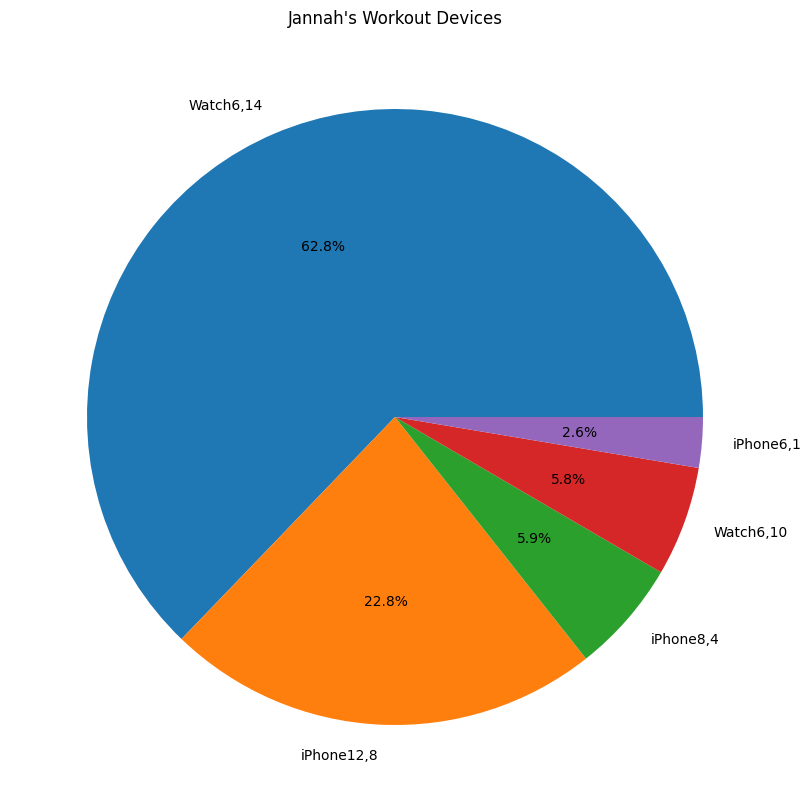

In [32]:
plotSource = totalSource.plot.pie(y='sourceName', figsize=(10, 10), autopct='%1.1f%%')
plt.ylabel('')
plt.xlabel('')
plt.title('Jannah\'s Workout Devices')
plt.show()

#Jannah records most of her data on the Apple Watch the most!

#Lets explore the other data in this dataframe

In [33]:
records_df

,type,sourceName,unit,creationDate,startDate,endDate,value,device
13,HKQuantityTypeIdentifierHeartRate,Jannah’s Apple Watch,count/min,2023-09-17 10:44:10 -0500,2023-09-17 10:42:00 -0500,2023-09-17 10:42:00 -0500,71,"Watch6,14"
14,HKQuantityTypeIdentifierHeartRate,Jannah’s Apple Watch,count/min,2023-09-17 10:45:48 -0500,2023-09-17 10:45:47 -0500,2023-09-17 10:45:47 -0500,104,"Watch6,14"
15,HKQuantityTypeIdentifierHeartRate,Jannah’s Apple Watch,count/min,2023-09-17 10:48:58 -0500,2023-09-17 10:47:40 -0500,2023-09-17 10:47:40 -0500,63.4445,"Watch6,14"
16,HKQuantityTypeIdentifierHeartRate,Jannah’s Apple Watch,count/min,2023-09-17 10:50:02 -0500,2023-09-17 10:47:48 -0500,2023-09-17 10:47:48 -0500,55,"Watch6,14"
17,HKQuantityTypeIdentifierHeartRate,Jannah’s Apple Watch,count/min,2023-09-17 10:57:10 -0500,2023-09-17 10:56:18 -0500,2023-09-17 10:56:18 -0500,106,"Watch6,14"
...,...,...,...,...,...,...,...,...
911267,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,Jannah’s Apple Watch,ms,2025-02-25 21:29:58 -0500,2025-02-25 21:28:57 -0500,2025-02-25 21:29:54 -0500,144.231,"Watch6,10"
911268,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,Jannah’s Apple Watch,ms,2025-02-26 06:45:04 -0500,2025-02-26 06:44:03 -0500,2025-02-26 06:45:03 -0500,120.072,"Watch6,10"
911269,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,Jannah’s Apple Watch,ms,2025-02-26 07:57:41 -0500,2025-02-26 07:56:40 -0500,2025-02-26 07:57:39 -0500,38.8269,"Watch6,10"
911270,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,Jannah’s Apple Watch,ms,2025-02-26 13:43:06 -0500,2025-02-26 13:42:05 -0500,2025-02-26 13:43:04 -0500,39.7098,"Watch6,10"


In [34]:
records_df['type'].unique()

array(['HKQuantityTypeIdentifierHeartRate',
       'HKQuantityTypeIdentifierRespiratoryRate',
       'HKQuantityTypeIdentifierStepCount',
       'HKQuantityTypeIdentifierDistanceWalkingRunning',
       'HKQuantityTypeIdentifierBasalEnergyBurned',
       'HKQuantityTypeIdentifierActiveEnergyBurned',
       'HKQuantityTypeIdentifierFlightsClimbed',
       'HKQuantityTypeIdentifierAppleExerciseTime',
       'HKQuantityTypeIdentifierDistanceCycling',
       'HKQuantityTypeIdentifierDistanceSwimming',
       'HKQuantityTypeIdentifierSwimmingStrokeCount',
       'HKQuantityTypeIdentifierEnvironmentalAudioExposure',
       'HKQuantityTypeIdentifierWalkingDoubleSupportPercentage',
       'HKQuantityTypeIdentifierWalkingSpeed',
       'HKQuantityTypeIdentifierWalkingStepLength',
       'HKQuantityTypeIdentifierWalkingAsymmetryPercentage',
       'HKQuantityTypeIdentifierAppleWalkingSteadiness',
       'HKQuantityTypeIdentifierTimeInDaylight',
       'HKQuantityTypeIdentifierHeartRateVariability

#Grab rows with Heart Rate Identifier

In [35]:
heart_rate = records_df[records_df['type'] == 'HKQuantityTypeIdentifierHeartRate']
heart_rate

,type,sourceName,unit,creationDate,startDate,endDate,value,device
13,HKQuantityTypeIdentifierHeartRate,Jannah’s Apple Watch,count/min,2023-09-17 10:44:10 -0500,2023-09-17 10:42:00 -0500,2023-09-17 10:42:00 -0500,71,"Watch6,14"
14,HKQuantityTypeIdentifierHeartRate,Jannah’s Apple Watch,count/min,2023-09-17 10:45:48 -0500,2023-09-17 10:45:47 -0500,2023-09-17 10:45:47 -0500,104,"Watch6,14"
15,HKQuantityTypeIdentifierHeartRate,Jannah’s Apple Watch,count/min,2023-09-17 10:48:58 -0500,2023-09-17 10:47:40 -0500,2023-09-17 10:47:40 -0500,63.4445,"Watch6,14"
16,HKQuantityTypeIdentifierHeartRate,Jannah’s Apple Watch,count/min,2023-09-17 10:50:02 -0500,2023-09-17 10:47:48 -0500,2023-09-17 10:47:48 -0500,55,"Watch6,14"
17,HKQuantityTypeIdentifierHeartRate,Jannah’s Apple Watch,count/min,2023-09-17 10:57:10 -0500,2023-09-17 10:56:18 -0500,2023-09-17 10:56:18 -0500,106,"Watch6,14"
...,...,...,...,...,...,...,...,...
102019,HKQuantityTypeIdentifierHeartRate,Jannah’s Apple Watch,count/min,2025-02-26 18:24:48 -0500,2025-02-26 18:21:35 -0500,2025-02-26 18:21:35 -0500,80,"Watch6,10"
102020,HKQuantityTypeIdentifierHeartRate,Jannah’s Apple Watch,count/min,2025-02-26 18:29:45 -0500,2025-02-26 18:26:21 -0500,2025-02-26 18:26:21 -0500,80,"Watch6,10"
102021,HKQuantityTypeIdentifierHeartRate,Jannah’s Apple Watch,count/min,2025-02-26 18:35:36 -0500,2025-02-26 18:31:44 -0500,2025-02-26 18:31:44 -0500,77,"Watch6,10"
102022,HKQuantityTypeIdentifierHeartRate,Jannah’s Apple Watch,count/min,2025-02-26 18:39:16 -0500,2025-02-26 18:34:00 -0500,2025-02-26 18:34:00 -0500,79,"Watch6,10"


In [36]:
heart_rate.dtypes

,0
type,object
sourceName,object
unit,object
creationDate,object
startDate,object
endDate,object
value,object
device,object


#**Let's analyze her average heart rate! :)**

In [37]:
heart_rate['value'] = pd.to_numeric(heart_rate['value'], errors='coerce')

<ipython-input-37-26b547f97d53>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart_rate['value'] = pd.to_numeric(heart_rate['value'], errors='coerce')


#Jannah's average heart rate for all time!. I'd say its really healthy! **84 Count/Min**:

In [38]:
average_heart_rate_all_time = np.mean(heart_rate['value'])
average_heart_rate_all_time

84.43259424375802

#Let's find out Jannah's average heart rate for each specific day to see which days she works out the most and which ones shes just bed rotting

In [39]:
heart_rate['creationDate'] = pd.to_datetime(heart_rate['creationDate']).dt.date
heart_rate

<ipython-input-39-8a0b944acdbf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart_rate['creationDate'] = pd.to_datetime(heart_rate['creationDate']).dt.date


,type,sourceName,unit,creationDate,startDate,endDate,value,device
13,HKQuantityTypeIdentifierHeartRate,Jannah’s Apple Watch,count/min,2023-09-17,2023-09-17 10:42:00 -0500,2023-09-17 10:42:00 -0500,71.0000,"Watch6,14"
14,HKQuantityTypeIdentifierHeartRate,Jannah’s Apple Watch,count/min,2023-09-17,2023-09-17 10:45:47 -0500,2023-09-17 10:45:47 -0500,104.0000,"Watch6,14"
15,HKQuantityTypeIdentifierHeartRate,Jannah’s Apple Watch,count/min,2023-09-17,2023-09-17 10:47:40 -0500,2023-09-17 10:47:40 -0500,63.4445,"Watch6,14"
16,HKQuantityTypeIdentifierHeartRate,Jannah’s Apple Watch,count/min,2023-09-17,2023-09-17 10:47:48 -0500,2023-09-17 10:47:48 -0500,55.0000,"Watch6,14"
17,HKQuantityTypeIdentifierHeartRate,Jannah’s Apple Watch,count/min,2023-09-17,2023-09-17 10:56:18 -0500,2023-09-17 10:56:18 -0500,106.0000,"Watch6,14"
...,...,...,...,...,...,...,...,...
102019,HKQuantityTypeIdentifierHeartRate,Jannah’s Apple Watch,count/min,2025-02-26,2025-02-26 18:21:35 -0500,2025-02-26 18:21:35 -0500,80.0000,"Watch6,10"
102020,HKQuantityTypeIdentifierHeartRate,Jannah’s Apple Watch,count/min,2025-02-26,2025-02-26 18:26:21 -0500,2025-02-26 18:26:21 -0500,80.0000,"Watch6,10"
102021,HKQuantityTypeIdentifierHeartRate,Jannah’s Apple Watch,count/min,2025-02-26,2025-02-26 18:31:44 -0500,2025-02-26 18:31:44 -0500,77.0000,"Watch6,10"
102022,HKQuantityTypeIdentifierHeartRate,Jannah’s Apple Watch,count/min,2025-02-26,2025-02-26 18:34:00 -0500,2025-02-26 18:34:00 -0500,79.0000,"Watch6,10"


In [40]:
heart_rate_per_day = heart_rate.groupby('creationDate')['value'].mean()
heart_rate_per_day

,value
creationDate,
2023-09-17,91.276707
2023-09-18,70.471606
2023-09-19,88.811479
2023-09-20,70.439298
2023-09-21,91.571834
...,...
2025-02-22,74.085098
2025-02-23,69.281119
2025-02-24,83.692484


In [41]:
heart_rate_per_day = heart_rate_per_day.to_frame()
heart_rate_per_day

,value
creationDate,
2023-09-17,91.276707
2023-09-18,70.471606
2023-09-19,88.811479
2023-09-20,70.439298
2023-09-21,91.571834
...,...
2025-02-22,74.085098
2025-02-23,69.281119
2025-02-24,83.692484


#Because there's so many unique values, lets just get the 10 largest values

In [42]:
largest_ten_heart_rate = heart_rate_per_day.nlargest(10, 'value')
largest_ten_heart_rate

,value
creationDate,
2024-05-30,178.534000
2024-05-02,162.250000
2024-12-23,155.600800
2025-01-05,154.086600
2024-11-14,153.952400
2024-12-10,151.226000
2024-11-18,149.155500
2024-12-13,145.377333
2025-01-15,144.625500


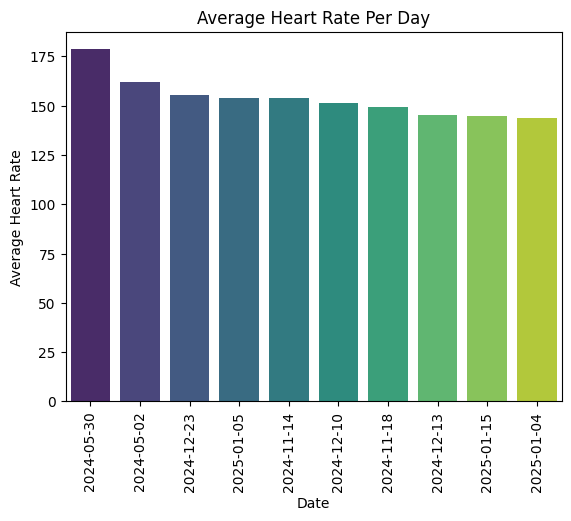

In [43]:
import seaborn as sns
sns.barplot(data = largest_ten_heart_rate, x = 'creationDate', y = 'value', hue = 'creationDate', legend = False, palette= "viridis")
plt.title('Average Heart Rate Per Day')
plt.xlabel('Date')
plt.ylabel('Average Heart Rate')
plt.xticks(rotation = 90)
plt.figure(figsize=(12, 8))
plt.close()
plt.show()

#Dang Jannah, how the fuck did your heart rate get up to 175?!

#Grab rows with respritory rate

In [44]:
respritory_rate = records_df[records_df['type'] == 'HKQuantityTypeIdentifierRespiratoryRate']
respritory_rate

,type,sourceName,unit,creationDate,startDate,endDate,value,device
102024,HKQuantityTypeIdentifierRespiratoryRate,Jannah’s Apple Watch,count/min,2025-01-27 06:02:53 -0500,2025-01-26 23:20:52 -0500,2025-01-26 23:20:52 -0500,24,"Watch6,10"
102025,HKQuantityTypeIdentifierRespiratoryRate,Jannah’s Apple Watch,count/min,2025-01-27 06:02:53 -0500,2025-01-26 23:32:22 -0500,2025-01-26 23:32:22 -0500,23,"Watch6,10"
102026,HKQuantityTypeIdentifierRespiratoryRate,Jannah’s Apple Watch,count/min,2025-01-27 06:02:53 -0500,2025-01-26 23:37:22 -0500,2025-01-26 23:37:22 -0500,23,"Watch6,10"
102027,HKQuantityTypeIdentifierRespiratoryRate,Jannah’s Apple Watch,count/min,2025-01-27 06:02:53 -0500,2025-01-26 23:51:52 -0500,2025-01-26 23:51:52 -0500,14,"Watch6,10"
102028,HKQuantityTypeIdentifierRespiratoryRate,Jannah’s Apple Watch,count/min,2025-01-27 06:02:53 -0500,2025-01-27 00:02:22 -0500,2025-01-27 00:02:22 -0500,16,"Watch6,10"
...,...,...,...,...,...,...,...,...
102987,HKQuantityTypeIdentifierRespiratoryRate,Jannah’s Apple Watch,count/min,2025-02-23 06:23:24 -0500,2025-02-23 05:28:08 -0500,2025-02-23 05:28:08 -0500,15,"Watch6,10"
102988,HKQuantityTypeIdentifierRespiratoryRate,Jannah’s Apple Watch,count/min,2025-02-23 06:23:24 -0500,2025-02-23 05:38:08 -0500,2025-02-23 05:38:08 -0500,15,"Watch6,10"
102989,HKQuantityTypeIdentifierRespiratoryRate,Jannah’s Apple Watch,count/min,2025-02-23 06:23:24 -0500,2025-02-23 05:52:09 -0500,2025-02-23 05:52:09 -0500,15.5,"Watch6,10"
102990,HKQuantityTypeIdentifierRespiratoryRate,Jannah’s Apple Watch,count/min,2025-02-23 06:23:24 -0500,2025-02-23 06:04:09 -0500,2025-02-23 06:04:09 -0500,16,"Watch6,10"


In [45]:
respritory_rate.dtypes

,0
type,object
sourceName,object
unit,object
creationDate,object
startDate,object
endDate,object
value,object
device,object


In [46]:
respritory_rate['value'] = pd.to_numeric(respritory_rate['value'], errors='coerce')

<ipython-input-46-2b74f29b5e53>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respritory_rate['value'] = pd.to_numeric(respritory_rate['value'], errors='coerce')


#Good god, your respritory rate is normal: 15.13 count/min

In [47]:
average_respritory_rate_all_time = np.mean(respritory_rate['value'])
average_respritory_rate_all_time

15.133264462809917

In [48]:
respritory_rate['creationDate'] = pd.to_datetime(respritory_rate['creationDate']).dt.date
respritory_rate

<ipython-input-48-04974317a70d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respritory_rate['creationDate'] = pd.to_datetime(respritory_rate['creationDate']).dt.date


,type,sourceName,unit,creationDate,startDate,endDate,value,device
102024,HKQuantityTypeIdentifierRespiratoryRate,Jannah’s Apple Watch,count/min,2025-01-27,2025-01-26 23:20:52 -0500,2025-01-26 23:20:52 -0500,24.0,"Watch6,10"
102025,HKQuantityTypeIdentifierRespiratoryRate,Jannah’s Apple Watch,count/min,2025-01-27,2025-01-26 23:32:22 -0500,2025-01-26 23:32:22 -0500,23.0,"Watch6,10"
102026,HKQuantityTypeIdentifierRespiratoryRate,Jannah’s Apple Watch,count/min,2025-01-27,2025-01-26 23:37:22 -0500,2025-01-26 23:37:22 -0500,23.0,"Watch6,10"
102027,HKQuantityTypeIdentifierRespiratoryRate,Jannah’s Apple Watch,count/min,2025-01-27,2025-01-26 23:51:52 -0500,2025-01-26 23:51:52 -0500,14.0,"Watch6,10"
102028,HKQuantityTypeIdentifierRespiratoryRate,Jannah’s Apple Watch,count/min,2025-01-27,2025-01-27 00:02:22 -0500,2025-01-27 00:02:22 -0500,16.0,"Watch6,10"
...,...,...,...,...,...,...,...,...
102987,HKQuantityTypeIdentifierRespiratoryRate,Jannah’s Apple Watch,count/min,2025-02-23,2025-02-23 05:28:08 -0500,2025-02-23 05:28:08 -0500,15.0,"Watch6,10"
102988,HKQuantityTypeIdentifierRespiratoryRate,Jannah’s Apple Watch,count/min,2025-02-23,2025-02-23 05:38:08 -0500,2025-02-23 05:38:08 -0500,15.0,"Watch6,10"
102989,HKQuantityTypeIdentifierRespiratoryRate,Jannah’s Apple Watch,count/min,2025-02-23,2025-02-23 05:52:09 -0500,2025-02-23 05:52:09 -0500,15.5,"Watch6,10"
102990,HKQuantityTypeIdentifierRespiratoryRate,Jannah’s Apple Watch,count/min,2025-02-23,2025-02-23 06:04:09 -0500,2025-02-23 06:04:09 -0500,16.0,"Watch6,10"


In [49]:
respritory_rate_per_day = respritory_rate.groupby('creationDate')['value'].mean()
respritory_rate_per_day

,value
creationDate,
2025-01-27,16.075000
2025-01-28,15.200000
2025-01-29,16.000000
2025-01-30,15.276316
2025-01-31,15.636364
2025-02-01,16.481481
2025-02-02,15.666667
2025-02-03,14.983333
2025-02-04,16.025641


In [50]:
respritory_rate_per_day = respritory_rate_per_day.to_frame()
respritory_rate_per_day

,value
creationDate,
2025-01-27,16.075000
2025-01-28,15.200000
2025-01-29,16.000000
2025-01-30,15.276316
2025-01-31,15.636364
2025-02-01,16.481481
2025-02-02,15.666667
2025-02-03,14.983333
2025-02-04,16.025641


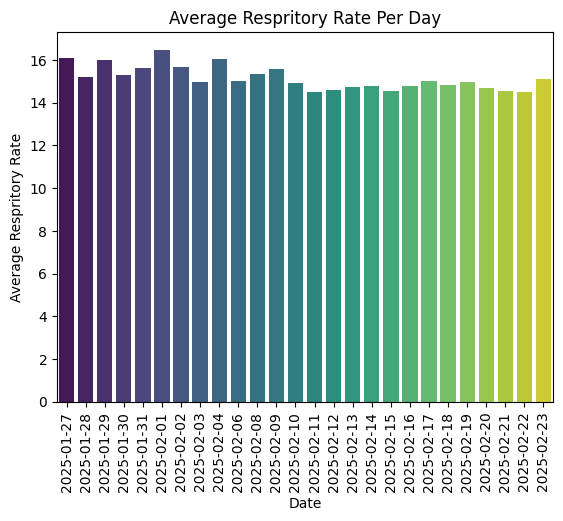

In [51]:
sns.barplot(data = respritory_rate_per_day, x = 'creationDate', y = 'value', hue = 'creationDate', legend = False, palette= "viridis")
plt.title('Average Respritory Rate Per Day')
plt.xlabel('Date')
plt.ylabel('Average Respritory Rate')
plt.xticks(rotation = 90)
plt.figure(figsize=(12, 8))
plt.close()
plt.show()

#Based on the graph above, its generally really normal

#Grab rows with Step Count

In [52]:
step_count = records_df[records_df['type'] == 'HKQuantityTypeIdentifierStepCount']
step_count

,type,sourceName,unit,creationDate,startDate,endDate,value,device
102992,HKQuantityTypeIdentifierStepCount,iPhone,count,2018-02-20 21:23:38 -0500,2018-02-20 21:06:51 -0500,2018-02-20 21:16:15 -0500,55,"iPhone8,4"
102993,HKQuantityTypeIdentifierStepCount,iPhone,count,2018-02-21 14:51:45 -0500,2018-02-21 07:35:04 -0500,2018-02-21 07:38:28 -0500,8,"iPhone8,4"
102994,HKQuantityTypeIdentifierStepCount,iPhone,count,2018-02-21 15:47:20 -0500,2018-02-21 14:44:13 -0500,2018-02-21 14:53:54 -0500,24,"iPhone8,4"
102995,HKQuantityTypeIdentifierStepCount,iPhone,count,2018-02-21 15:47:20 -0500,2018-02-21 14:53:54 -0500,2018-02-21 15:03:35 -0500,266,"iPhone8,4"
102996,HKQuantityTypeIdentifierStepCount,iPhone,count,2018-02-21 15:47:20 -0500,2018-02-21 15:03:35 -0500,2018-02-21 15:13:25 -0500,44,"iPhone8,4"
...,...,...,...,...,...,...,...,...
194930,HKQuantityTypeIdentifierStepCount,Jannah’s Apple Watch,count,2025-02-26 19:02:06 -0500,2025-02-26 18:59:31 -0500,2025-02-26 18:59:38 -0500,3,"Watch6,10"
194931,HKQuantityTypeIdentifierStepCount,Jannah’s Apple Watch,count,2025-02-26 19:02:07 -0500,2025-02-26 19:00:01 -0500,2025-02-26 19:00:53 -0500,16,"Watch6,10"
194932,HKQuantityTypeIdentifierStepCount,Jannah’s Apple Watch,count,2025-02-26 19:05:37 -0500,2025-02-26 19:01:34 -0500,2025-02-26 19:01:36 -0500,4,"Watch6,10"
194933,HKQuantityTypeIdentifierStepCount,Jannah’s Apple Watch,count,2025-02-26 19:05:37 -0500,2025-02-26 19:02:50 -0500,2025-02-26 19:02:55 -0500,22,"Watch6,10"


In [53]:
step_count.dtypes

,0
type,object
sourceName,object
unit,object
creationDate,object
startDate,object
endDate,object
value,object
device,object


In [54]:
step_count['value'] = pd.to_numeric(step_count['value'], errors='coerce')

<ipython-input-54-77a7c1886e75>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  step_count['value'] = pd.to_numeric(step_count['value'], errors='coerce')


#Total step count all entires

In [148]:
sum_step_count_all_time = np.sum(step_count['value'])
sum_step_count_all_time

12159096

In [56]:
step_count['creationDate'] = pd.to_datetime(step_count['creationDate']).dt.date
step_count

<ipython-input-56-182b67122c6b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  step_count['creationDate'] = pd.to_datetime(step_count['creationDate']).dt.date


,type,sourceName,unit,creationDate,startDate,endDate,value,device
102992,HKQuantityTypeIdentifierStepCount,iPhone,count,2018-02-20,2018-02-20 21:06:51 -0500,2018-02-20 21:16:15 -0500,55,"iPhone8,4"
102993,HKQuantityTypeIdentifierStepCount,iPhone,count,2018-02-21,2018-02-21 07:35:04 -0500,2018-02-21 07:38:28 -0500,8,"iPhone8,4"
102994,HKQuantityTypeIdentifierStepCount,iPhone,count,2018-02-21,2018-02-21 14:44:13 -0500,2018-02-21 14:53:54 -0500,24,"iPhone8,4"
102995,HKQuantityTypeIdentifierStepCount,iPhone,count,2018-02-21,2018-02-21 14:53:54 -0500,2018-02-21 15:03:35 -0500,266,"iPhone8,4"
102996,HKQuantityTypeIdentifierStepCount,iPhone,count,2018-02-21,2018-02-21 15:03:35 -0500,2018-02-21 15:13:25 -0500,44,"iPhone8,4"
...,...,...,...,...,...,...,...,...
194930,HKQuantityTypeIdentifierStepCount,Jannah’s Apple Watch,count,2025-02-26,2025-02-26 18:59:31 -0500,2025-02-26 18:59:38 -0500,3,"Watch6,10"
194931,HKQuantityTypeIdentifierStepCount,Jannah’s Apple Watch,count,2025-02-26,2025-02-26 19:00:01 -0500,2025-02-26 19:00:53 -0500,16,"Watch6,10"
194932,HKQuantityTypeIdentifierStepCount,Jannah’s Apple Watch,count,2025-02-26,2025-02-26 19:01:34 -0500,2025-02-26 19:01:36 -0500,4,"Watch6,10"
194933,HKQuantityTypeIdentifierStepCount,Jannah’s Apple Watch,count,2025-02-26,2025-02-26 19:02:50 -0500,2025-02-26 19:02:55 -0500,22,"Watch6,10"


In [57]:
step_count_per_day = step_count.groupby('creationDate')['value'].mean()
step_count_per_day

,value
creationDate,
2016-04-30,34.750000
2016-05-04,67.000000
2016-05-05,121.375000
2016-05-06,75.875000
2016-05-07,69.500000
...,...
2025-02-22,78.821656
2025-02-23,163.116883
2025-02-24,115.584158


In [58]:
step_count_per_day = step_count_per_day.to_frame()
largest_ten_step_count = step_count_per_day.nlargest(10, 'value')
largest_ten_step_count

,value
creationDate,
2021-04-11,977.875000
2021-03-21,944.750000
2021-03-09,936.000000
2021-02-09,914.600000
2021-02-24,885.400000
2024-01-20,879.000000
2023-07-29,872.375000
2021-02-23,864.750000
2021-09-05,833.166667


#Dang, my sis is a workout machine

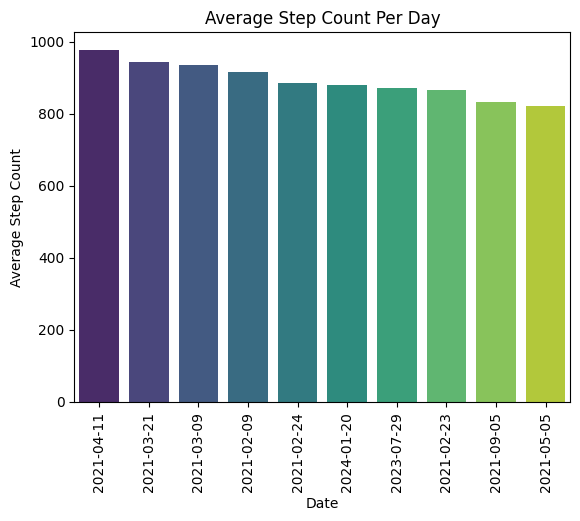

In [59]:
sns.barplot(data = largest_ten_step_count, x = 'creationDate', y = 'value', hue = 'creationDate', legend = False, palette= "viridis")
plt.title('Average Step Count Per Day')
plt.xlabel('Date')
plt.ylabel('Average Step Count')
plt.xticks(rotation = 90)
plt.figure(figsize=(12, 8))
plt.close()
plt.show()

#How many miles does jannah walk/run

In [60]:
runWalk = records_df[records_df['type'] == 'HKQuantityTypeIdentifierDistanceWalkingRunning']
runWalk

,type,sourceName,unit,creationDate,startDate,endDate,value,device
194935,HKQuantityTypeIdentifierDistanceWalkingRunning,iPhone,mi,2018-02-20 21:23:38 -0500,2018-02-20 21:06:51 -0500,2018-02-20 21:16:15 -0500,0.0243515,"iPhone8,4"
194936,HKQuantityTypeIdentifierDistanceWalkingRunning,iPhone,mi,2018-02-21 14:51:45 -0500,2018-02-21 07:35:04 -0500,2018-02-21 07:38:28 -0500,0.00233636,"iPhone8,4"
194937,HKQuantityTypeIdentifierDistanceWalkingRunning,iPhone,mi,2018-02-21 15:47:20 -0500,2018-02-21 14:44:13 -0500,2018-02-21 14:53:54 -0500,0.00850036,"iPhone8,4"
194938,HKQuantityTypeIdentifierDistanceWalkingRunning,iPhone,mi,2018-02-21 15:47:20 -0500,2018-02-21 14:53:54 -0500,2018-02-21 15:03:35 -0500,0.0956539,"iPhone8,4"
194939,HKQuantityTypeIdentifierDistanceWalkingRunning,iPhone,mi,2018-02-21 15:47:20 -0500,2018-02-21 15:03:35 -0500,2018-02-21 15:13:25 -0500,0.0158574,"iPhone8,4"
...,...,...,...,...,...,...,...,...
302573,HKQuantityTypeIdentifierDistanceWalkingRunning,Jannah’s Apple Watch,mi,2025-02-26 19:02:06 -0500,2025-02-26 18:59:31 -0500,2025-02-26 18:59:38 -0500,0.00127272,"Watch6,10"
302574,HKQuantityTypeIdentifierDistanceWalkingRunning,Jannah’s Apple Watch,mi,2025-02-26 19:02:07 -0500,2025-02-26 19:00:01 -0500,2025-02-26 19:00:53 -0500,0.00678784,"Watch6,10"
302575,HKQuantityTypeIdentifierDistanceWalkingRunning,Jannah’s Apple Watch,mi,2025-02-26 19:05:37 -0500,2025-02-26 19:01:34 -0500,2025-02-26 19:01:36 -0500,0.00169696,"Watch6,10"
302576,HKQuantityTypeIdentifierDistanceWalkingRunning,Jannah’s Apple Watch,mi,2025-02-26 19:05:37 -0500,2025-02-26 19:02:50 -0500,2025-02-26 19:02:55 -0500,0.00977421,"Watch6,10"


In [61]:
runWalk['value'] = pd.to_numeric(runWalk['value'], errors='coerce')

<ipython-input-61-3aa891ff16cc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  runWalk['value'] = pd.to_numeric(runWalk['value'], errors='coerce')


#Girl, that is a small distance

In [62]:
average_run_walk_all_time = np.mean(runWalk['value'])
average_run_walk_all_time

0.04744508460074042

In [63]:
runWalk['creationDate'] = pd.to_datetime(runWalk['creationDate']).dt.date

<ipython-input-63-b0e5d49a86bc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  runWalk['creationDate'] = pd.to_datetime(runWalk['creationDate']).dt.date


In [64]:
runWalk_per_day = runWalk.groupby('creationDate')['value'].mean()
runWalk_per_day

,value
creationDate,
2016-04-30,0.009021
2016-05-04,0.017646
2016-05-05,0.031303
2016-05-06,0.019188
2016-05-07,0.026074
...,...
2025-02-22,0.027390
2025-02-23,0.060780
2025-02-24,0.031831


In [65]:
runWalk_per_day = runWalk_per_day.to_frame()
largest_ten_runWalk = runWalk_per_day.nlargest(10, 'value')
largest_ten_runWalk

,value
creationDate,
2024-01-20,1.064820
2021-03-09,0.418211
2021-04-11,0.407439
2021-02-23,0.381019
2023-07-29,0.379962
2021-02-09,0.363552
2025-01-07,0.352989
2021-03-21,0.340000
2021-02-24,0.339888


#What happened on January 1st, 2024??

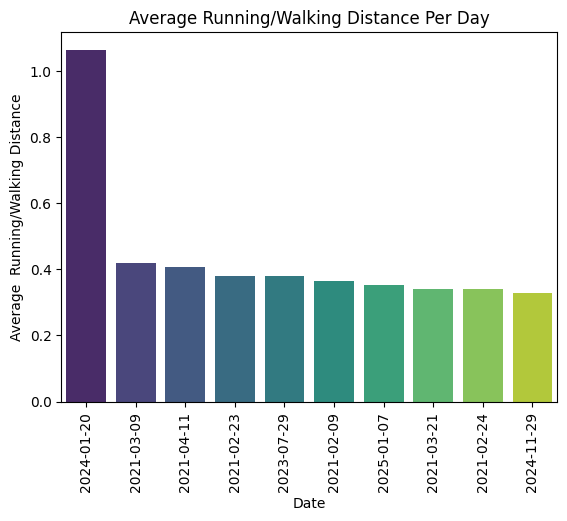

In [66]:
sns.barplot(data = largest_ten_runWalk, x = 'creationDate', y = 'value', hue = 'creationDate', legend = False, palette= "viridis")
plt.title('Average Running/Walking Distance Per Day')
plt.xlabel('Date')
plt.ylabel('Average  Running/Walking Distance')
plt.xticks(rotation = 90)
plt.figure(figsize=(12, 8))
plt.close()
plt.show()

#Analyze Active Energy Burned



In [67]:
energyBurned = records_df[records_df['type'] == 'HKQuantityTypeIdentifierActiveEnergyBurned']
energyBurned

,type,sourceName,unit,creationDate,startDate,endDate,value,device
427430,HKQuantityTypeIdentifierActiveEnergyBurned,iPhone (2),Cal,2022-09-20 08:47:26 -0500,2022-09-19 09:14:26 -0500,2022-09-19 09:22:12 -0500,1.857,"iPhone12,8"
427431,HKQuantityTypeIdentifierActiveEnergyBurned,iPhone (2),Cal,2022-09-20 08:47:26 -0500,2022-09-19 09:50:50 -0500,2022-09-19 09:59:59 -0500,0.87,"iPhone12,8"
427432,HKQuantityTypeIdentifierActiveEnergyBurned,iPhone (2),Cal,2022-09-20 08:47:26 -0500,2022-09-19 11:37:01 -0500,2022-09-19 11:38:22 -0500,1.196,"iPhone12,8"
427433,HKQuantityTypeIdentifierActiveEnergyBurned,iPhone (2),Cal,2022-09-20 08:47:26 -0500,2022-09-19 13:04:33 -0500,2022-09-19 13:14:28 -0500,7.825,"iPhone12,8"
427434,HKQuantityTypeIdentifierActiveEnergyBurned,iPhone (2),Cal,2022-09-20 08:47:26 -0500,2022-09-19 13:15:01 -0500,2022-09-19 13:25:04 -0500,10.343,"iPhone12,8"
...,...,...,...,...,...,...,...,...
594135,HKQuantityTypeIdentifierActiveEnergyBurned,Jannah’s Apple Watch,Cal,2025-02-26 19:09:00 -0500,2025-02-26 19:06:59 -0500,2025-02-26 19:08:00 -0500,0.2,"Watch6,10"
594136,HKQuantityTypeIdentifierActiveEnergyBurned,Jannah’s Apple Watch,Cal,2025-02-26 19:09:02 -0500,2025-02-26 19:08:31 -0500,2025-02-26 19:08:51 -0500,0.062,"Watch6,10"
594137,HKQuantityTypeIdentifierActiveEnergyBurned,Jannah’s Apple Watch,Cal,2025-02-26 19:21:26 -0500,2025-02-26 19:08:51 -0500,2025-02-26 19:17:44 -0500,1.229,"Watch6,10"
594138,HKQuantityTypeIdentifierActiveEnergyBurned,Jannah’s Apple Watch,Cal,2025-02-26 19:36:21 -0500,2025-02-26 19:20:28 -0500,2025-02-26 19:20:58 -0500,0.092,"Watch6,10"


In [68]:
energyBurned['value'] = pd.to_numeric(energyBurned['value'], errors='coerce')

<ipython-input-68-ea345ccbedd8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  energyBurned['value'] = pd.to_numeric(energyBurned['value'], errors='coerce')


#1 Cal Burned on average

In [69]:
energyBurned_all_time = np.mean(energyBurned['value'])
energyBurned_all_time

1.0096722572131247

In [70]:
energyBurned['creationDate'] = pd.to_datetime(energyBurned['creationDate']).dt.date

<ipython-input-70-5cffa23b6449>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  energyBurned['creationDate'] = pd.to_datetime(energyBurned['creationDate']).dt.date


In [71]:
energyBurned_per_day = energyBurned.groupby('creationDate')['value'].mean()
energyBurned_per_day

,value
creationDate,
2022-09-20,4.578604
2022-09-21,2.997516
2022-09-22,4.458059
2022-09-23,1.361311
2022-09-24,1.949563
...,...
2025-02-22,0.816580
2025-02-23,2.308284
2025-02-24,1.057693


#Dang girl! You burned a lot of energy!!!!

In [72]:
energyBurned_per_day = energyBurned_per_day.to_frame()
largest_ten_energyBurned = energyBurned_per_day.nlargest(10, 'value')
largest_ten_energyBurned

,value
creationDate,
2024-01-20,38.086000
2025-01-05,34.630789
2024-12-23,34.629600
2024-12-28,29.577400
2025-01-01,28.043400
2024-12-21,27.549333
2025-01-18,27.342600
2024-12-14,27.318000
2025-01-16,27.264600


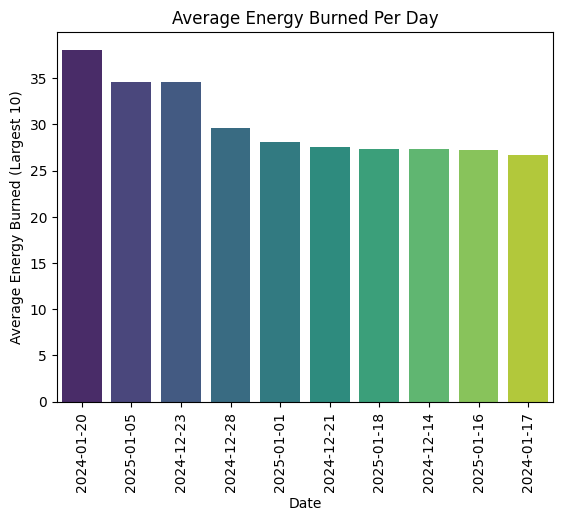

In [73]:
sns.barplot(data = largest_ten_energyBurned, x = 'creationDate', y = 'value', hue = 'creationDate', legend = False, palette= "viridis")
plt.title('Average Energy Burned Per Day')
plt.xlabel('Date')
plt.ylabel('Average Energy Burned (Largest 10)')
plt.xticks(rotation = 90)
plt.figure(figsize=(12, 8))
plt.close()
plt.show()

#Analyze Basal Energy Burned

In [74]:
basalenergyBurned = records_df[records_df['type'] == 'HKQuantityTypeIdentifierBasalEnergyBurned']
basalenergyBurned

,type,sourceName,unit,creationDate,startDate,endDate,value,device
302578,HKQuantityTypeIdentifierBasalEnergyBurned,iPhone (2),Cal,2022-09-20 08:47:26 -0500,2022-09-19 08:52:15 -0500,2022-09-19 09:14:26 -0500,19.008,"iPhone12,8"
302579,HKQuantityTypeIdentifierBasalEnergyBurned,iPhone (2),Cal,2022-09-20 08:47:26 -0500,2022-09-19 09:14:26 -0500,2022-09-19 09:35:15 -0500,17.816,"iPhone12,8"
302580,HKQuantityTypeIdentifierBasalEnergyBurned,iPhone (2),Cal,2022-09-20 08:47:26 -0500,2022-09-19 09:35:15 -0500,2022-09-19 09:50:50 -0500,13.203,"iPhone12,8"
302581,HKQuantityTypeIdentifierBasalEnergyBurned,iPhone (2),Cal,2022-09-20 08:47:26 -0500,2022-09-19 09:50:50 -0500,2022-09-19 10:05:52 -0500,12.347,"iPhone12,8"
302582,HKQuantityTypeIdentifierBasalEnergyBurned,iPhone (2),Cal,2022-09-20 08:47:26 -0500,2022-09-19 10:05:52 -0500,2022-09-19 10:11:43 -0500,5.011,"iPhone12,8"
...,...,...,...,...,...,...,...,...
427425,HKQuantityTypeIdentifierBasalEnergyBurned,Jannah’s Apple Watch,Cal,2025-02-26 18:59:32 -0500,2025-02-26 18:43:56 -0500,2025-02-26 18:59:18 -0500,13.735,"Watch6,10"
427426,HKQuantityTypeIdentifierBasalEnergyBurned,Jannah’s Apple Watch,Cal,2025-02-26 19:15:19 -0500,2025-02-26 18:59:18 -0500,2025-02-26 18:59:28 -0500,0.184,"Watch6,10"
427427,HKQuantityTypeIdentifierBasalEnergyBurned,Jannah’s Apple Watch,Cal,2025-02-26 19:15:19 -0500,2025-02-26 18:59:28 -0500,2025-02-26 19:14:29 -0500,14.868,"Watch6,10"
427428,HKQuantityTypeIdentifierBasalEnergyBurned,Jannah’s Apple Watch,Cal,2025-02-26 19:36:21 -0500,2025-02-26 19:14:29 -0500,2025-02-26 19:15:00 -0500,0.489,"Watch6,10"


In [75]:
basalenergyBurned['value'] = pd.to_numeric(basalenergyBurned['value'], errors='coerce')

<ipython-input-75-39e8e01b29ac>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  basalenergyBurned['value'] = pd.to_numeric(basalenergyBurned['value'], errors='coerce')


In [76]:
basalenergyBurned_all_time = np.mean(basalenergyBurned['value'])
basalenergyBurned_all_time

8.346309558517286

In [77]:
basalenergyBurned['creationDate'] = pd.to_datetime(basalenergyBurned['creationDate']).dt.date
basalenergyBurned_per_day = basalenergyBurned.groupby('creationDate')['value'].mean()
basalenergyBurned_per_day

<ipython-input-77-8e5d94b50b96>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  basalenergyBurned['creationDate'] = pd.to_datetime(basalenergyBurned['creationDate']).dt.date


,value
creationDate,
2022-09-20,16.897102
2022-09-21,15.367051
2022-09-22,16.743697
2022-09-23,15.553528
2022-09-24,17.576630
...,...
2025-02-22,7.583674
2025-02-23,8.592960
2025-02-24,8.396502


In [78]:
basalenergyBurned_per_day = basalenergyBurned_per_day.to_frame()
largest_ten_basalenergyBurned = basalenergyBurned_per_day.nlargest(10, 'value')
largest_ten_basalenergyBurned

,value
creationDate,
2024-01-21,70.127000
2024-01-22,57.322848
2024-01-20,50.388923
2023-12-08,45.067900
2023-09-16,39.879485
2023-08-20,38.975161
2024-06-16,38.889283
2023-07-02,37.012219
2023-08-02,36.205805


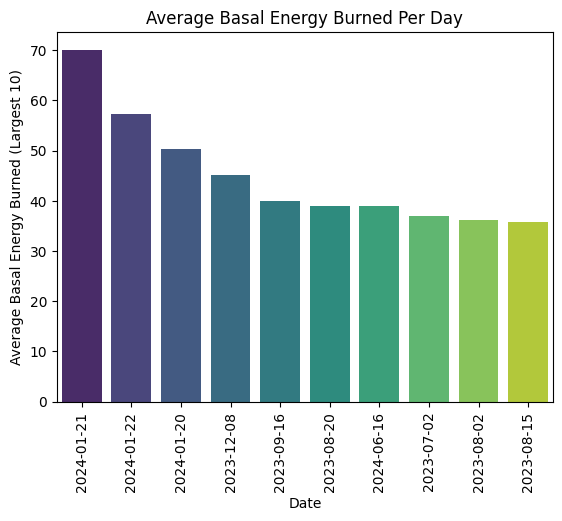

In [79]:
sns.barplot(data = largest_ten_basalenergyBurned, x = 'creationDate', y = 'value', hue = 'creationDate', legend = False, palette= "viridis")
plt.title('Average Basal Energy Burned Per Day')
plt.xlabel('Date')
plt.ylabel('Average Basal Energy Burned (Largest 10)')
plt.xticks(rotation = 90)
plt.figure(figsize=(12, 8))
plt.close()
plt.show()

#Grab rows with flights climbed

In [80]:
flightsClimbed = records_df[records_df['type'] == 'HKQuantityTypeIdentifierFlightsClimbed']
flightsClimbed

,type,sourceName,unit,creationDate,startDate,endDate,value,device
594140,HKQuantityTypeIdentifierFlightsClimbed,iPhone (2),count,2021-03-17 09:30:28 -0500,2021-03-17 09:19:53 -0500,2021-03-17 09:19:56 -0500,1,"iPhone12,8"
594141,HKQuantityTypeIdentifierFlightsClimbed,iPhone (2),count,2021-03-28 14:16:51 -0500,2021-03-28 14:04:16 -0500,2021-03-28 14:04:18 -0500,1,"iPhone12,8"
594142,HKQuantityTypeIdentifierFlightsClimbed,iPhone (2),count,2021-04-12 07:27:57 -0500,2021-04-12 07:14:49 -0500,2021-04-12 07:14:52 -0500,1,"iPhone12,8"
594143,HKQuantityTypeIdentifierFlightsClimbed,iPhone (2),count,2021-04-12 12:43:12 -0500,2021-04-12 12:21:52 -0500,2021-04-12 12:22:05 -0500,2,"iPhone12,8"
594144,HKQuantityTypeIdentifierFlightsClimbed,iPhone (2),count,2021-04-13 07:25:21 -0500,2021-04-13 07:04:13 -0500,2021-04-13 07:04:16 -0500,1,"iPhone12,8"
...,...,...,...,...,...,...,...,...
596678,HKQuantityTypeIdentifierFlightsClimbed,Jannah’s Apple Watch,count,2025-02-25 09:36:50 -0500,2025-02-25 09:24:37 -0500,2025-02-25 09:24:40 -0500,1,"Watch6,10"
596679,HKQuantityTypeIdentifierFlightsClimbed,Jannah’s Apple Watch,count,2025-02-25 10:39:44 -0500,2025-02-25 10:26:23 -0500,2025-02-25 10:26:26 -0500,1,"Watch6,10"
596680,HKQuantityTypeIdentifierFlightsClimbed,iPhone (2),count,2025-02-25 10:41:21 -0500,2025-02-25 10:26:22 -0500,2025-02-25 10:26:24 -0500,1,"iPhone12,8"
596681,HKQuantityTypeIdentifierFlightsClimbed,iPhone (2),count,2025-02-26 12:47:26 -0500,2025-02-26 12:34:26 -0500,2025-02-26 12:34:29 -0500,1,"iPhone12,8"


In [81]:
flightsClimbed['value'] = pd.to_numeric(flightsClimbed['value'], errors='coerce')

<ipython-input-81-53b1becbe6fe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flightsClimbed['value'] = pd.to_numeric(flightsClimbed['value'], errors='coerce')


In [82]:
flightsClimbed_all_time = np.mean(flightsClimbed['value'])
flightsClimbed_all_time

1.8167518678725914

In [83]:
flightsClimbed['creationDate'] = pd.to_datetime(flightsClimbed['creationDate']).dt.date
flightsClimbed_per_day = flightsClimbed.groupby('creationDate')['value'].mean()
flightsClimbed_per_day

<ipython-input-83-8a65b04df310>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flightsClimbed['creationDate'] = pd.to_datetime(flightsClimbed['creationDate']).dt.date


,value
creationDate,
2021-03-17,1.000000
2021-03-28,1.000000
2021-04-12,1.500000
2021-04-13,1.500000
2021-04-19,1.500000
...,...
2025-02-18,1.500000
2025-02-22,1.500000
2025-02-24,1.666667


In [84]:
flightsClimbed_per_day = flightsClimbed_per_day.to_frame()
largest_ten_flightsClimbed = flightsClimbed_per_day.nlargest(10, 'value')
largest_ten_flightsClimbed

,value
creationDate,
2022-06-09,6.000000
2022-08-17,5.500000
2022-09-21,5.500000
2022-10-11,5.000000
2024-08-11,5.000000
2022-02-10,4.500000
2022-04-16,4.000000
2023-01-12,4.000000
2022-04-27,3.750000


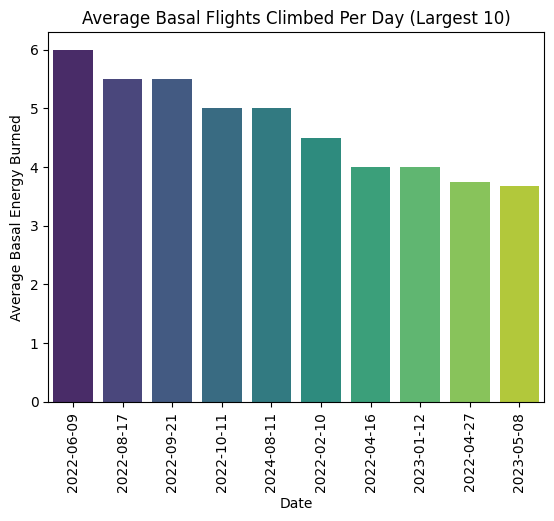

In [85]:
sns.barplot(data = largest_ten_flightsClimbed, x = 'creationDate', y = 'value', hue = 'creationDate', legend = False, palette= "viridis")
plt.title('Average Basal Flights Climbed Per Day (Largest 10)')
plt.xlabel('Date')
plt.ylabel('Average Basal Energy Burned')
plt.xticks(rotation = 90)
plt.figure(figsize=(12, 8))
plt.close()
plt.show()

#Cycling Distance, even though we barely do this :(

In [86]:
cyclingDistance = records_df[records_df['type'] == 'HKQuantityTypeIdentifierDistanceCycling']
cyclingDistance

,type,sourceName,unit,creationDate,startDate,endDate,value,device
606261,HKQuantityTypeIdentifierDistanceCycling,Jannah’s Apple Watch,mi,2024-02-11 16:32:31 -0500,2024-02-11 16:30:03 -0500,2024-02-11 16:30:04 -0500,0.00166382,"Watch6,14"
606262,HKQuantityTypeIdentifierDistanceCycling,Jannah’s Apple Watch,mi,2024-02-11 16:32:31 -0500,2024-02-11 16:30:04 -0500,2024-02-11 16:30:05 -0500,0.000496923,"Watch6,14"
606263,HKQuantityTypeIdentifierDistanceCycling,Jannah’s Apple Watch,mi,2024-02-11 16:32:31 -0500,2024-02-11 16:30:05 -0500,2024-02-11 16:30:06 -0500,0.000525638,"Watch6,14"
606264,HKQuantityTypeIdentifierDistanceCycling,Jannah’s Apple Watch,mi,2024-02-11 16:32:31 -0500,2024-02-11 16:30:06 -0500,2024-02-11 16:30:07 -0500,0.00221452,"Watch6,14"
606265,HKQuantityTypeIdentifierDistanceCycling,Jannah’s Apple Watch,mi,2024-02-11 16:32:31 -0500,2024-02-11 16:30:07 -0500,2024-02-11 16:30:09 -0500,0.00246729,"Watch6,14"
...,...,...,...,...,...,...,...,...
608974,HKQuantityTypeIdentifierDistanceCycling,Jannah’s Apple Watch,mi,2024-12-19 22:52:36 -0500,2024-08-21 14:45:41 -0500,2024-08-21 14:47:41 -0500,0.322541,"Watch6,14"
608975,HKQuantityTypeIdentifierDistanceCycling,Jannah’s Apple Watch,mi,2024-12-19 22:52:36 -0500,2024-08-21 14:47:41 -0500,2024-08-21 14:50:52 -0500,0.266346,"Watch6,14"
608976,HKQuantityTypeIdentifierDistanceCycling,Jannah’s Apple Watch,mi,2024-12-19 22:52:36 -0500,2024-08-21 14:50:52 -0500,2024-08-21 14:53:01 -0500,0.236452,"Watch6,14"
608977,HKQuantityTypeIdentifierDistanceCycling,Jannah’s Apple Watch,mi,2024-12-19 22:52:37 -0500,2024-08-21 14:53:01 -0500,2024-08-21 14:55:00 -0500,0.264996,"Watch6,14"


# 0.023 overall average because we don't bike like that

In [87]:
cyclingDistance['value'] = pd.to_numeric(cyclingDistance['value'], errors='coerce')
cyclingDistance_all_time = np.mean(cyclingDistance['value'])
cyclingDistance_all_time

<ipython-input-87-5b382cbe84ea>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cyclingDistance['value'] = pd.to_numeric(cyclingDistance['value'], errors='coerce')


0.023103018278350623

In [88]:
cyclingDistance['creationDate'] = pd.to_datetime(cyclingDistance['creationDate']).dt.date
cyclingDistance_per_day = cyclingDistance.groupby('creationDate')['value'].mean()
cyclingDistance_per_day

<ipython-input-88-d9868c13f8e8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cyclingDistance['creationDate'] = pd.to_datetime(cyclingDistance['creationDate']).dt.date


,value
creationDate,
2024-02-11,0.001884
2024-03-03,0.000108
2024-03-12,0.014840
2024-04-14,0.001301
2024-06-11,0.208137
2024-07-02,0.231989
2024-07-05,0.290548
2024-07-08,0.237611
2024-07-11,0.252825


In [89]:
cyclingDistance_per_day = cyclingDistance_per_day.to_frame()
largest_ten_cyclingDistance = cyclingDistance_per_day.nlargest(10, 'value')
largest_ten_cyclingDistance

,value
creationDate,
2024-07-05,0.290548
2024-07-11,0.252825
2024-12-19,0.245958
2024-07-08,0.237611
2024-08-06,0.232574
2024-07-02,0.231989
2024-08-12,0.227790
2024-12-10,0.218875
2024-06-11,0.208137


#0.29 miles is highest because we don't bike often, only in the spring/early summer

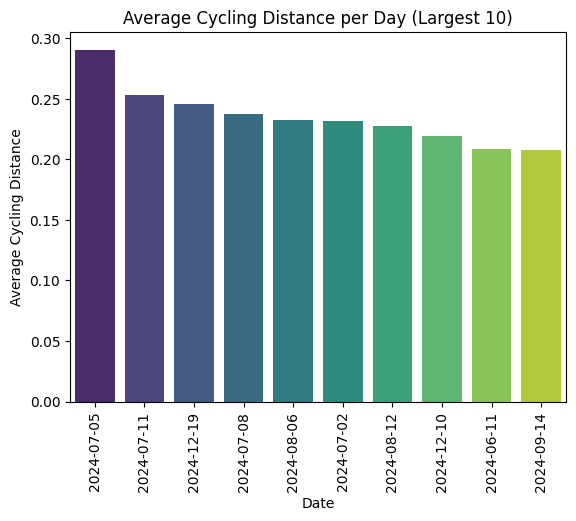

In [90]:
sns.barplot(data = largest_ten_cyclingDistance, x = 'creationDate', y = 'value', hue = 'creationDate', legend = False, palette= "viridis")
plt.title('Average Cycling Distance per Day (Largest 10)')
plt.xlabel('Date')
plt.ylabel('Average Cycling Distance')
plt.xticks(rotation = 90)
plt.figure(figsize=(12, 8))
plt.close()
plt.show()

#Jannah's a Swimmer so this will be very valuable data analysis

In [91]:
swimmingDistance = records_df[records_df['type'] == 'HKQuantityTypeIdentifierDistanceSwimming']
swimmingDistance

,type,sourceName,unit,creationDate,startDate,endDate,value,device
608979,HKQuantityTypeIdentifierDistanceSwimming,Jannah’s Apple Watch,yd,2023-09-28 15:20:10 -0500,2023-09-28 15:19:04 -0500,2023-09-28 15:19:31 -0500,25,"Watch6,14"
608980,HKQuantityTypeIdentifierDistanceSwimming,Jannah’s Apple Watch,yd,2023-09-28 15:20:46 -0500,2023-09-28 15:19:36 -0500,2023-09-28 15:20:05 -0500,25,"Watch6,14"
608981,HKQuantityTypeIdentifierDistanceSwimming,Jannah’s Apple Watch,yd,2023-09-28 15:21:22 -0500,2023-09-28 15:20:08 -0500,2023-09-28 15:20:40 -0500,25,"Watch6,14"
608982,HKQuantityTypeIdentifierDistanceSwimming,Jannah’s Apple Watch,yd,2023-09-28 15:21:56 -0500,2023-09-28 15:20:40 -0500,2023-09-28 15:21:15 -0500,25,"Watch6,14"
608983,HKQuantityTypeIdentifierDistanceSwimming,Jannah’s Apple Watch,yd,2023-09-28 15:22:34 -0500,2023-09-28 15:21:15 -0500,2023-09-28 15:21:50 -0500,25,"Watch6,14"
...,...,...,...,...,...,...,...,...
609529,HKQuantityTypeIdentifierDistanceSwimming,Jannah’s Apple Watch,yd,2025-02-07 16:17:57 -0500,2025-02-07 16:15:52 -0500,2025-02-07 16:17:52 -0500,25,"Watch6,10"
609530,HKQuantityTypeIdentifierDistanceSwimming,Jannah’s Apple Watch,yd,2025-02-07 16:19:43 -0500,2025-02-07 16:19:12 -0500,2025-02-07 16:19:38 -0500,25,"Watch6,10"
609531,HKQuantityTypeIdentifierDistanceSwimming,Jannah’s Apple Watch,yd,2025-02-07 16:20:13 -0500,2025-02-07 16:19:40 -0500,2025-02-07 16:20:07 -0500,25,"Watch6,10"
609532,HKQuantityTypeIdentifierDistanceSwimming,Jannah’s Apple Watch,yd,2025-02-07 16:20:42 -0500,2025-02-07 16:20:08 -0500,2025-02-07 16:20:37 -0500,25,"Watch6,10"


#25 yds, on average, im assuming its more on competition days

In [92]:
swimmingDistance['value'] = pd.to_numeric(swimmingDistance['value'], errors='coerce')
swimmingDistance_all_time = np.mean(swimmingDistance['value'])
swimmingDistance_all_time

<ipython-input-92-c3819bb39b83>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  swimmingDistance['value'] = pd.to_numeric(swimmingDistance['value'], errors='coerce')


25.22563176895307

#Not as high as I thought

In [93]:
swimmingDistance['creationDate'] = pd.to_datetime(swimmingDistance['creationDate']).dt.date
swimmingDistance_per_day = swimmingDistance.groupby('creationDate')['value'].mean()
swimmingDistance_per_day

<ipython-input-93-0269d8514b03>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  swimmingDistance['creationDate'] = pd.to_datetime(swimmingDistance['creationDate']).dt.date


,value
creationDate,
2023-09-28,25.000000
2023-10-03,25.000000
2023-10-28,25.000000
2023-10-31,25.000000
2024-04-15,25.000000
2024-04-18,25.000000
2024-04-22,25.000000
2024-04-25,25.000000
2024-06-08,25.000000


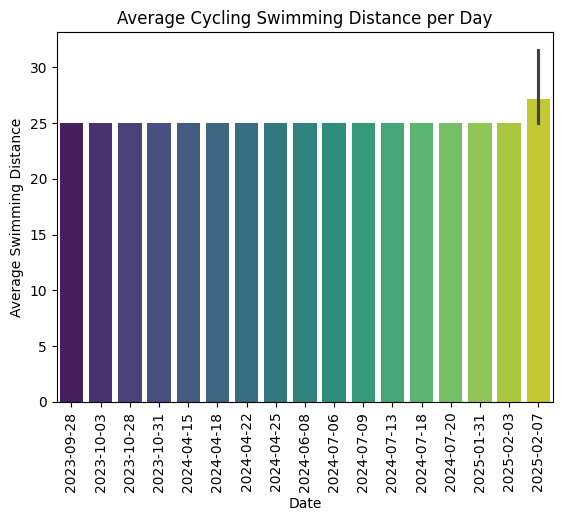

In [94]:
swimmingDistance_per_day = swimmingDistance_per_day.to_frame()
sns.barplot(data = swimmingDistance, x = 'creationDate', y = 'value', hue = 'creationDate', legend = False, palette= "viridis")
plt.title('Average Cycling Swimming Distance per Day')
plt.xlabel('Date')
plt.ylabel('Average Swimming Distance')
plt.xticks(rotation = 90)
plt.figure(figsize=(12, 8))
plt.close()
plt.show()

#Get rows for Swim Strokes, but there was none

#Get rows for Environmental Audio Exposure

In [95]:
environmentalAudio = records_df[records_df['type'] == 'HKQuantityTypeIdentifierEnvironmentalAudioExposure']
environmentalAudio

,type,sourceName,unit,creationDate,startDate,endDate,value,device
610660,HKQuantityTypeIdentifierEnvironmentalAudioExpo...,Jannah’s Apple Watch,dBASPL,2023-09-17 10:51:46 -0500,2023-09-17 10:41:41 -0500,2023-09-17 11:11:39 -0500,58.8286,"Watch6,14"
610661,HKQuantityTypeIdentifierEnvironmentalAudioExpo...,Jannah’s Apple Watch,dBASPL,2023-09-17 11:13:00 -0500,2023-09-17 11:11:39 -0500,2023-09-17 11:41:34 -0500,53.2652,"Watch6,14"
610662,HKQuantityTypeIdentifierEnvironmentalAudioExpo...,Jannah’s Apple Watch,dBASPL,2023-09-17 11:53:55 -0500,2023-09-17 11:41:34 -0500,2023-09-17 12:11:30 -0500,57.3122,"Watch6,14"
610663,HKQuantityTypeIdentifierEnvironmentalAudioExpo...,Jannah’s Apple Watch,dBASPL,2023-09-17 12:18:45 -0500,2023-09-17 12:11:30 -0500,2023-09-17 12:41:25 -0500,56.5711,"Watch6,14"
610664,HKQuantityTypeIdentifierEnvironmentalAudioExpo...,Jannah’s Apple Watch,dBASPL,2023-09-17 12:41:50 -0500,2023-09-17 12:41:25 -0500,2023-09-17 13:11:20 -0500,65.1424,"Watch6,14"
...,...,...,...,...,...,...,...,...
623382,HKQuantityTypeIdentifierEnvironmentalAudioExpo...,Jannah’s Apple Watch,dBASPL,2025-02-26 15:53:04 -0500,2025-02-26 15:51:19 -0500,2025-02-26 16:21:14 -0500,69.975,"Watch6,10"
623383,HKQuantityTypeIdentifierEnvironmentalAudioExpo...,Jannah’s Apple Watch,dBASPL,2025-02-26 16:28:34 -0500,2025-02-26 16:21:14 -0500,2025-02-26 16:51:14 -0500,61.5631,"Watch6,10"
623384,HKQuantityTypeIdentifierEnvironmentalAudioExpo...,Jannah’s Apple Watch,dBASPL,2025-02-26 16:59:15 -0500,2025-02-26 16:51:14 -0500,2025-02-26 17:21:09 -0500,53.1741,"Watch6,10"
623385,HKQuantityTypeIdentifierEnvironmentalAudioExpo...,Jannah’s Apple Watch,dBASPL,2025-02-26 17:44:12 -0500,2025-02-26 17:21:09 -0500,2025-02-26 17:22:04 -0500,68.6578,"Watch6,10"


#Jannah isn't too exposed to high noise environments on average

In [96]:
environmentalAudio['value'] = pd.to_numeric(environmentalAudio['value'], errors='coerce')
environmentalAudio_all_time = np.mean(environmentalAudio['value'])
environmentalAudio_all_time

<ipython-input-96-2e2074b0914e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  environmentalAudio['value'] = pd.to_numeric(environmentalAudio['value'], errors='coerce')


58.896066975720906

In [97]:
environmentalAudio['creationDate'] = pd.to_datetime(environmentalAudio['creationDate']).dt.date
environmentalAudio_per_day = environmentalAudio.groupby('creationDate')['value'].mean()
environmentalAudio_per_day

<ipython-input-97-a8b966cbd56e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  environmentalAudio['creationDate'] = pd.to_datetime(environmentalAudio['creationDate']).dt.date


,value
creationDate,
2023-09-17,59.346350
2023-09-18,59.408434
2023-09-19,62.642149
2023-09-20,60.528317
2023-09-21,58.295005
...,...
2025-02-22,56.488112
2025-02-23,53.856252
2025-02-24,62.456855


#Not too high of an audio exposure

In [98]:
environmentalAudio_per_day = environmentalAudio_per_day.to_frame()
largest_ten_environmentalAudio = environmentalAudio_per_day.nlargest(10, 'value')
largest_ten_environmentalAudio

,value
creationDate,
2024-08-31,78.803230
2024-05-22,72.998028
2023-11-19,72.942164
2024-08-27,72.699100
2023-11-08,71.355691
2024-01-23,70.668738
2024-03-03,69.756941
2025-02-07,69.290558
2023-11-03,69.238548


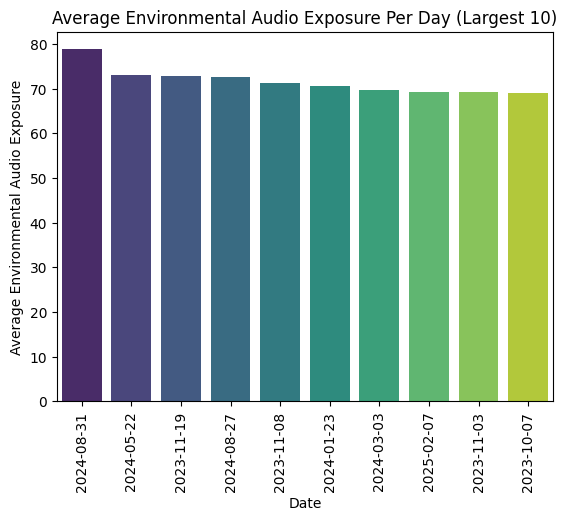

In [99]:
sns.barplot(data = largest_ten_environmentalAudio, x = 'creationDate', y = 'value', hue = 'creationDate', legend = False, palette= "viridis")
plt.title('Average Environmental Audio Exposure Per Day (Largest 10)')
plt.xlabel('Date')
plt.ylabel('Average Environmental Audio Exposure')
plt.xticks(rotation = 90)
plt.figure(figsize=(12, 8))
plt.close()
plt.show()

#Get rows with walking double support percentage, aka, walking really slow

In [100]:
walkingDoubleSupport = records_df[records_df['type'] == 'HKQuantityTypeIdentifierWalkingDoubleSupportPercentage']
walkingDoubleSupport

,type,sourceName,unit,creationDate,startDate,endDate,value,device
623780,HKQuantityTypeIdentifierWalkingDoubleSupportPe...,iPhone (2),%,2021-01-27 13:23:32 -0500,2021-01-27 12:40:14 -0500,2021-01-27 12:40:17 -0500,0.31,"iPhone12,8"
623781,HKQuantityTypeIdentifierWalkingDoubleSupportPe...,iPhone (2),%,2021-01-27 13:23:32 -0500,2021-01-27 12:48:26 -0500,2021-01-27 12:53:25 -0500,0.298,"iPhone12,8"
623782,HKQuantityTypeIdentifierWalkingDoubleSupportPe...,iPhone (2),%,2021-01-27 13:23:32 -0500,2021-01-27 12:53:25 -0500,2021-01-27 12:54:59 -0500,0.277,"iPhone12,8"
623783,HKQuantityTypeIdentifierWalkingDoubleSupportPe...,iPhone (2),%,2021-01-27 13:23:32 -0500,2021-01-27 12:55:11 -0500,2021-01-27 12:57:42 -0500,0.281,"iPhone12,8"
623784,HKQuantityTypeIdentifierWalkingDoubleSupportPe...,iPhone (2),%,2021-01-27 13:23:32 -0500,2021-01-27 12:58:13 -0500,2021-01-27 13:03:13 -0500,0.285,"iPhone12,8"
...,...,...,...,...,...,...,...,...
642706,HKQuantityTypeIdentifierWalkingDoubleSupportPe...,iPhone (2),%,2025-02-26 14:14:08 -0500,2025-02-26 13:52:31 -0500,2025-02-26 13:52:33 -0500,0.275,"iPhone12,8"
642707,HKQuantityTypeIdentifierWalkingDoubleSupportPe...,iPhone (2),%,2025-02-26 14:14:08 -0500,2025-02-26 14:00:39 -0500,2025-02-26 14:01:03 -0500,0.28,"iPhone12,8"
642708,HKQuantityTypeIdentifierWalkingDoubleSupportPe...,iPhone (2),%,2025-02-26 14:14:08 -0500,2025-02-26 14:02:08 -0500,2025-02-26 14:02:46 -0500,0.256,"iPhone12,8"
642709,HKQuantityTypeIdentifierWalkingDoubleSupportPe...,iPhone (2),%,2025-02-26 16:36:27 -0500,2025-02-26 15:54:54 -0500,2025-02-26 15:55:17 -0500,0.274,"iPhone12,8"


#29%

In [101]:
walkingDoubleSupport['value'] = pd.to_numeric(walkingDoubleSupport['value'], errors='coerce')
walkingDoubleSupport_all_time = np.mean(walkingDoubleSupport['value'])
walkingDoubleSupport_all_time

<ipython-input-101-00b063647870>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  walkingDoubleSupport['value'] = pd.to_numeric(walkingDoubleSupport['value'], errors='coerce')


0.29557244730864723

In [102]:
walkingDoubleSupport['creationDate'] = pd.to_datetime(walkingDoubleSupport['creationDate']).dt.date
walkingDoubleSupport_per_day = walkingDoubleSupport.groupby('creationDate')['value'].mean()
walkingDoubleSupport_per_day

<ipython-input-102-bbc3bfe4613b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  walkingDoubleSupport['creationDate'] = pd.to_datetime(walkingDoubleSupport['creationDate']).dt.date


,value
creationDate,
2021-01-27,0.294875
2021-01-28,0.308000
2021-01-30,0.301444
2021-02-03,0.292308
2021-02-04,0.306333
...,...
2025-02-18,0.282176
2025-02-22,0.280667
2025-02-23,0.285826


In [103]:
walkingDoubleSupport_per_day = walkingDoubleSupport_per_day.to_frame()
largest_ten_walkingDoubleSupport = walkingDoubleSupport_per_day.nlargest(10, 'value')
largest_ten_walkingDoubleSupport

,value
creationDate,
2022-03-18,0.343000
2023-06-18,0.342500
2023-04-14,0.342000
2023-06-10,0.339000
2023-04-06,0.336800
2023-01-18,0.336450
2023-08-22,0.335733
2023-01-16,0.335130
2023-04-19,0.334455


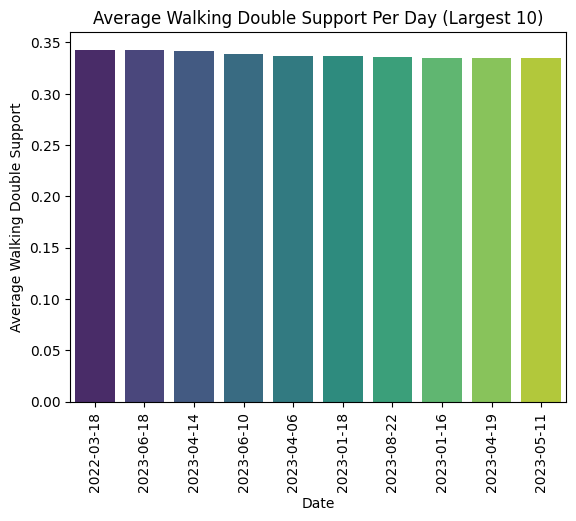

In [104]:
sns.barplot(data = largest_ten_walkingDoubleSupport, x = 'creationDate', y = 'value', hue = 'creationDate', legend = False, palette= "viridis")
plt.title('Average Walking Double Support Per Day (Largest 10)')
plt.xlabel('Date')
plt.ylabel('Average Walking Double Support')
plt.xticks(rotation = 90)
plt.figure(figsize=(12, 8))
plt.close()
plt.show()

#Get rows with walking speed

In [105]:
walkingSpeed = records_df[records_df['type'] == 'HKQuantityTypeIdentifierWalkingSpeed']
walkingSpeed

,type,sourceName,unit,creationDate,startDate,endDate,value,device
665289,HKQuantityTypeIdentifierWalkingSpeed,iPhone (2),mi/hr,2021-01-27 13:23:32 -0500,2021-01-27 12:40:14 -0500,2021-01-27 12:40:17 -0500,2.23694,"iPhone12,8"
665290,HKQuantityTypeIdentifierWalkingSpeed,iPhone (2),mi/hr,2021-01-27 13:23:32 -0500,2021-01-27 12:48:26 -0500,2021-01-27 12:53:25 -0500,2.72906,"iPhone12,8"
665291,HKQuantityTypeIdentifierWalkingSpeed,iPhone (2),mi/hr,2021-01-27 13:23:32 -0500,2021-01-27 12:53:25 -0500,2021-01-27 12:54:59 -0500,3.10934,"iPhone12,8"
665292,HKQuantityTypeIdentifierWalkingSpeed,iPhone (2),mi/hr,2021-01-27 13:23:32 -0500,2021-01-27 12:55:11 -0500,2021-01-27 12:57:42 -0500,3.0646,"iPhone12,8"
665293,HKQuantityTypeIdentifierWalkingSpeed,iPhone (2),mi/hr,2021-01-27 13:23:32 -0500,2021-01-27 12:58:13 -0500,2021-01-27 13:03:13 -0500,3.01986,"iPhone12,8"
...,...,...,...,...,...,...,...,...
686640,HKQuantityTypeIdentifierWalkingSpeed,iPhone (2),mi/hr,2025-02-26 14:14:08 -0500,2025-02-26 13:52:31 -0500,2025-02-26 13:52:33 -0500,2.61722,"iPhone12,8"
686641,HKQuantityTypeIdentifierWalkingSpeed,iPhone (2),mi/hr,2025-02-26 14:14:08 -0500,2025-02-26 14:00:39 -0500,2025-02-26 14:01:03 -0500,2.63958,"iPhone12,8"
686642,HKQuantityTypeIdentifierWalkingSpeed,iPhone (2),mi/hr,2025-02-26 14:14:08 -0500,2025-02-26 14:02:08 -0500,2025-02-26 14:02:46 -0500,3.01986,"iPhone12,8"
686643,HKQuantityTypeIdentifierWalkingSpeed,iPhone (2),mi/hr,2025-02-26 16:36:27 -0500,2025-02-26 15:54:54 -0500,2025-02-26 15:55:17 -0500,2.81854,"iPhone12,8"


#2.5 mi/hr is like speed walking

In [106]:
walkingSpeed['value'] = pd.to_numeric(walkingSpeed['value'], errors='coerce')
walkingSpeed_all_time = np.mean(walkingSpeed['value'])
walkingSpeed_all_time

<ipython-input-106-1b182e9fd828>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  walkingSpeed['value'] = pd.to_numeric(walkingSpeed['value'], errors='coerce')


2.5068634560310916

In [107]:
walkingSpeed['creationDate'] = pd.to_datetime(walkingSpeed['creationDate']).dt.date
walkingSpeed_per_day = walkingSpeed.groupby('creationDate')['value'].mean()
walkingSpeed_per_day

<ipython-input-107-9f3a38b182cc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  walkingSpeed['creationDate'] = pd.to_datetime(walkingSpeed['creationDate']).dt.date


,value
creationDate,
2021-01-27,2.801433
2021-01-28,2.125090
2021-01-30,2.606619
2021-02-03,2.661155
2021-02-04,2.604788
...,...
2025-02-18,2.343813
2025-02-22,2.360828
2025-02-23,2.298674


#certain days, jannahs walking speed is almost 4 mi/hr

In [108]:
walkingSpeed_per_day = walkingSpeed_per_day.to_frame()
largest_ten_walkingSpeed = walkingSpeed_per_day.nlargest(10, 'value')
largest_ten_walkingSpeed

,value
creationDate,
2022-03-26,3.690940
2021-12-13,3.662184
2022-04-21,3.576612
2021-05-03,3.571109
2021-05-10,3.566315
2021-12-09,3.563119
2022-01-20,3.546788
2021-04-19,3.536082
2021-12-14,3.525756


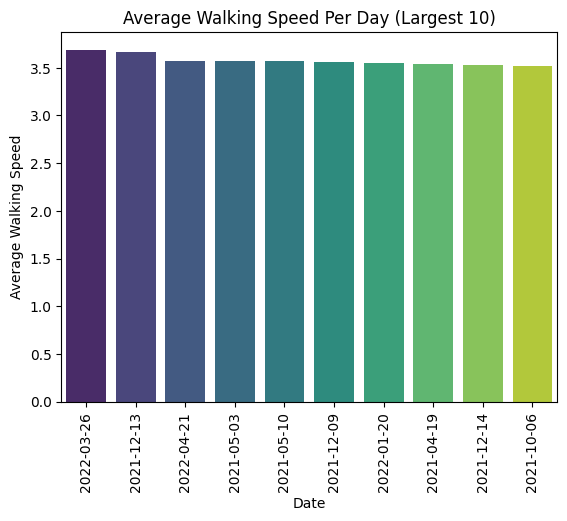

In [109]:
sns.barplot(data = largest_ten_walkingSpeed, x = 'creationDate', y = 'value', hue = 'creationDate', legend = False, palette= "viridis")
plt.title('Average Walking Speed Per Day (Largest 10)')
plt.xlabel('Date')
plt.ylabel('Average Walking Speed')
plt.xticks(rotation = 90)
plt.figure(figsize=(12, 8))
plt.close()
plt.show()

#Get rows with Walking Step Length



In [110]:
walkingStep = records_df[records_df['type'] == 'HKQuantityTypeIdentifierWalkingStepLength']
walkingStep

,type,sourceName,unit,creationDate,startDate,endDate,value,device
686645,HKQuantityTypeIdentifierWalkingStepLength,iPhone (2),in,2021-01-27 13:23:32 -0500,2021-01-27 12:40:14 -0500,2021-01-27 12:40:17 -0500,25.1969,"iPhone12,8"
686646,HKQuantityTypeIdentifierWalkingStepLength,iPhone (2),in,2021-01-27 13:23:32 -0500,2021-01-27 12:48:26 -0500,2021-01-27 12:53:25 -0500,28.7402,"iPhone12,8"
686647,HKQuantityTypeIdentifierWalkingStepLength,iPhone (2),in,2021-01-27 13:23:32 -0500,2021-01-27 12:53:25 -0500,2021-01-27 12:54:59 -0500,31.4961,"iPhone12,8"
686648,HKQuantityTypeIdentifierWalkingStepLength,iPhone (2),in,2021-01-27 13:23:32 -0500,2021-01-27 12:55:11 -0500,2021-01-27 12:57:42 -0500,31.1024,"iPhone12,8"
686649,HKQuantityTypeIdentifierWalkingStepLength,iPhone (2),in,2021-01-27 13:23:32 -0500,2021-01-27 12:58:13 -0500,2021-01-27 13:03:13 -0500,31.1024,"iPhone12,8"
...,...,...,...,...,...,...,...,...
707996,HKQuantityTypeIdentifierWalkingStepLength,iPhone (2),in,2025-02-26 14:14:08 -0500,2025-02-26 13:52:31 -0500,2025-02-26 13:52:33 -0500,24.4094,"iPhone12,8"
707997,HKQuantityTypeIdentifierWalkingStepLength,iPhone (2),in,2025-02-26 14:14:08 -0500,2025-02-26 14:00:39 -0500,2025-02-26 14:01:03 -0500,26.378,"iPhone12,8"
707998,HKQuantityTypeIdentifierWalkingStepLength,iPhone (2),in,2025-02-26 14:14:08 -0500,2025-02-26 14:02:08 -0500,2025-02-26 14:02:46 -0500,29.5276,"iPhone12,8"
707999,HKQuantityTypeIdentifierWalkingStepLength,iPhone (2),in,2025-02-26 16:36:27 -0500,2025-02-26 15:54:54 -0500,2025-02-26 15:55:17 -0500,27.1654,"iPhone12,8"


#About 26 in, thats pretty long since for some of those years, she was shorter and is 5'3

In [111]:
walkingStep['value'] = pd.to_numeric(walkingStep['value'], errors='coerce')
walkingStep_all_time = np.mean(walkingStep['value'])
walkingStep_all_time

<ipython-input-111-20b564c5b793>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  walkingStep['value'] = pd.to_numeric(walkingStep['value'], errors='coerce')


25.788404649747147

In [112]:
walkingStep['creationDate'] = pd.to_datetime(walkingStep['creationDate']).dt.date
walkingStep_per_day = walkingStep.groupby('creationDate')['value'].mean()
walkingStep_per_day

<ipython-input-112-c7aef97446b7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  walkingStep['creationDate'] = pd.to_datetime(walkingStep['creationDate']).dt.date


,value
creationDate,
2021-01-27,29.689700
2021-01-28,21.653500
2021-01-30,27.911332
2021-02-03,27.812161
2021-02-04,27.209122
...,...
2025-02-18,24.256344
2025-02-22,24.136892
2025-02-23,24.519688


In [113]:
walkingStep_per_day = walkingStep_per_day.to_frame()
largest_ten_walkingStep = walkingStep_per_day.nlargest(10, 'value')
largest_ten_walkingStep

,value
creationDate,
2022-03-26,37.401600
2021-12-13,36.220500
2021-12-09,34.814429
2021-12-17,34.227394
2022-01-20,34.120767
2021-05-10,33.970786
2021-12-14,33.918869
2021-10-06,33.902044
2021-05-03,33.886421


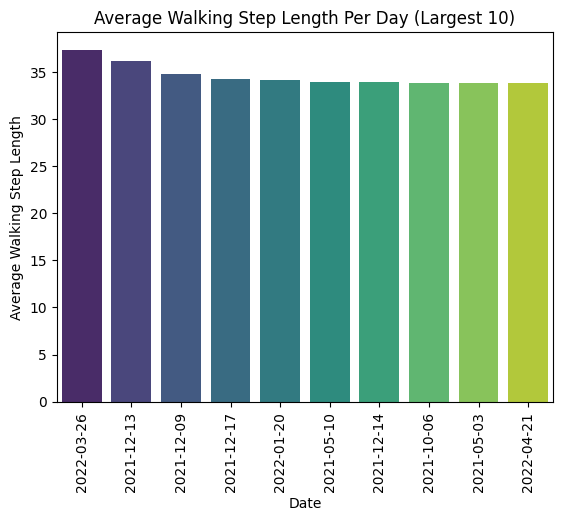

In [114]:
sns.barplot(data = largest_ten_walkingStep, x = 'creationDate', y = 'value', hue = 'creationDate', legend = False, palette= "viridis")
plt.title('Average Walking Step Length Per Day (Largest 10)')
plt.xlabel('Date')
plt.ylabel('Average Walking Step Length')
plt.xticks(rotation = 90)
plt.figure(figsize=(12, 8))
plt.close()
plt.show()

#Get rows with Walking Assymetry Percentage, aka does jannah have asymetrical legs

In [115]:
walking_assymetry_percentage = records_df[records_df['type'] == 'HKQuantityTypeIdentifierWalkingAsymmetryPercentage']
walking_assymetry_percentage

,type,sourceName,unit,creationDate,startDate,endDate,value,device
708001,HKQuantityTypeIdentifierWalkingAsymmetryPercen...,iPhone (2),%,2021-01-27 13:23:32 -0500,2021-01-27 12:48:26 -0500,2021-01-27 12:53:25 -0500,0,"iPhone12,8"
708002,HKQuantityTypeIdentifierWalkingAsymmetryPercen...,iPhone (2),%,2021-01-27 13:23:32 -0500,2021-01-27 12:53:25 -0500,2021-01-27 12:54:59 -0500,0,"iPhone12,8"
708003,HKQuantityTypeIdentifierWalkingAsymmetryPercen...,iPhone (2),%,2021-01-27 13:23:32 -0500,2021-01-27 12:55:11 -0500,2021-01-27 12:57:42 -0500,0,"iPhone12,8"
708004,HKQuantityTypeIdentifierWalkingAsymmetryPercen...,iPhone (2),%,2021-01-27 13:23:32 -0500,2021-01-27 12:58:13 -0500,2021-01-27 13:03:13 -0500,0,"iPhone12,8"
708005,HKQuantityTypeIdentifierWalkingAsymmetryPercen...,iPhone (2),%,2021-01-27 13:23:32 -0500,2021-01-27 13:03:13 -0500,2021-01-27 13:04:21 -0500,0.05,"iPhone12,8"
...,...,...,...,...,...,...,...,...
719730,HKQuantityTypeIdentifierWalkingAsymmetryPercen...,iPhone (2),%,2025-02-26 14:14:08 -0500,2025-02-26 13:15:15 -0500,2025-02-26 13:17:51 -0500,0.01,"iPhone12,8"
719731,HKQuantityTypeIdentifierWalkingAsymmetryPercen...,iPhone (2),%,2025-02-26 14:14:08 -0500,2025-02-26 14:00:39 -0500,2025-02-26 14:01:03 -0500,0,"iPhone12,8"
719732,HKQuantityTypeIdentifierWalkingAsymmetryPercen...,iPhone (2),%,2025-02-26 14:14:08 -0500,2025-02-26 14:02:08 -0500,2025-02-26 14:02:46 -0500,0,"iPhone12,8"
719733,HKQuantityTypeIdentifierWalkingAsymmetryPercen...,iPhone (2),%,2025-02-26 16:36:27 -0500,2025-02-26 15:54:54 -0500,2025-02-26 15:55:17 -0500,0.06,"iPhone12,8"


#Not very asymetrical. You have average symmetry. Mom was wrong girl...

In [116]:
walking_assymetry_percentage['value'] = pd.to_numeric(walking_assymetry_percentage['value'], errors='coerce')
walking_assymetry_percentage_all_time = np.mean(walking_assymetry_percentage['value'])
walking_assymetry_percentage_all_time

<ipython-input-116-41e62991c0de>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  walking_assymetry_percentage['value'] = pd.to_numeric(walking_assymetry_percentage['value'], errors='coerce')


0.03752599284131583

In [117]:
walking_assymetry_percentage['creationDate'] = pd.to_datetime(walking_assymetry_percentage['creationDate']).dt.date
walking_assymetry_percentage_per_day = walking_assymetry_percentage.groupby('creationDate')['value'].mean()
walking_assymetry_percentage_per_day

<ipython-input-117-2c6cd018896d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  walking_assymetry_percentage['creationDate'] = pd.to_datetime(walking_assymetry_percentage['creationDate']).dt.date


,value
creationDate,
2021-01-27,0.004545
2021-01-30,0.045000
2021-02-03,0.004211
2021-02-04,0.013750
2021-02-09,0.000000
...,...
2025-02-18,0.016000
2025-02-22,0.005000
2025-02-23,0.058000


In [118]:
walking_assymetry_percentage_per_day = walking_assymetry_percentage_per_day.to_frame()
largest_ten_walking_assymetry_percentage_per_day = walking_assymetry_percentage_per_day.nlargest(10, 'value')
largest_ten_walking_assymetry_percentage_per_day

,value
creationDate,
2023-06-18,0.695000
2024-09-29,0.480000
2022-12-12,0.465000
2024-07-21,0.446000
2024-05-24,0.405000
2024-06-04,0.393056
2023-05-11,0.387143
2022-09-24,0.365000
2024-06-17,0.340000


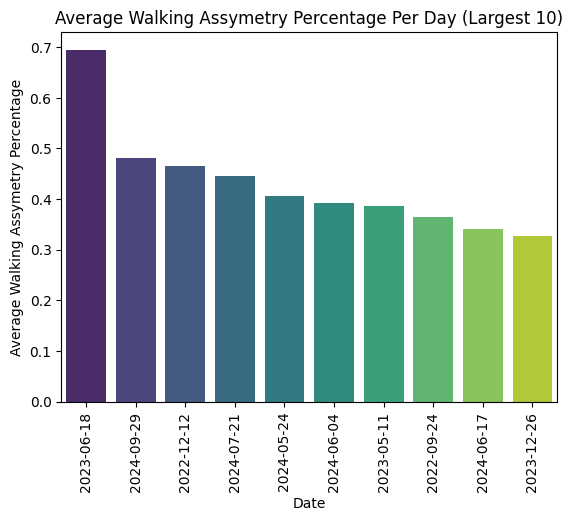

In [119]:
sns.barplot(data = largest_ten_walking_assymetry_percentage_per_day, x = 'creationDate', y = 'value', hue = 'creationDate', legend = False, palette= "viridis")
plt.title('Average Walking Assymetry Percentage Per Day (Largest 10)')
plt.xlabel('Date')
plt.ylabel('Average Walking Assymetry Percentage')
plt.xticks(rotation = 90)
plt.figure(figsize=(12, 8))
plt.close()
plt.show()

#Get rows for walking steadiness, but there was none



#Get rows that say how much time spent in daylight

In [120]:
daylight = records_df[records_df['type'] == 'HKQuantityTypeIdentifierTimeInDaylight']
daylight

,type,sourceName,unit,creationDate,startDate,endDate,value,device
721780,HKQuantityTypeIdentifierTimeInDaylight,Jannah’s Apple Watch,min,2023-11-27 15:20:36 -0500,2023-11-27 14:57:32 -0500,2023-11-27 15:02:32 -0500,5,"Watch6,14"
721781,HKQuantityTypeIdentifierTimeInDaylight,Jannah’s Apple Watch,min,2023-11-27 16:36:26 -0500,2023-11-27 15:02:32 -0500,2023-11-27 15:07:32 -0500,1,"Watch6,14"
721782,HKQuantityTypeIdentifierTimeInDaylight,Jannah’s Apple Watch,min,2023-11-30 10:41:15 -0500,2023-11-30 10:14:57 -0500,2023-11-30 10:19:57 -0500,1,"Watch6,14"
721783,HKQuantityTypeIdentifierTimeInDaylight,Jannah’s Apple Watch,min,2023-11-30 12:41:41 -0500,2023-11-30 12:30:54 -0500,2023-11-30 12:35:54 -0500,4,"Watch6,14"
721784,HKQuantityTypeIdentifierTimeInDaylight,Jannah’s Apple Watch,min,2023-11-30 14:17:47 -0500,2023-11-30 14:04:47 -0500,2023-11-30 14:09:47 -0500,3,"Watch6,14"
...,...,...,...,...,...,...,...,...
723260,HKQuantityTypeIdentifierTimeInDaylight,Jannah’s Apple Watch,min,2025-02-26 12:47:23 -0500,2025-02-26 12:29:59 -0500,2025-02-26 12:34:59 -0500,5,"Watch6,10"
723261,HKQuantityTypeIdentifierTimeInDaylight,Jannah’s Apple Watch,min,2025-02-26 12:47:23 -0500,2025-02-26 12:34:59 -0500,2025-02-26 12:39:59 -0500,3,"Watch6,10"
723262,HKQuantityTypeIdentifierTimeInDaylight,Jannah’s Apple Watch,min,2025-02-26 13:32:46 -0500,2025-02-26 13:11:24 -0500,2025-02-26 13:16:24 -0500,5,"Watch6,10"
723263,HKQuantityTypeIdentifierTimeInDaylight,Jannah’s Apple Watch,min,2025-02-26 13:32:46 -0500,2025-02-26 13:16:24 -0500,2025-02-26 13:21:24 -0500,3,"Watch6,10"


#We don't spend a lot of time outside. That explains our low vitamin D. We spend an average of 4 minutes outside. Like ugh naur.

In [121]:
daylight['value'] = pd.to_numeric(daylight['value'], errors='coerce')
daylight_all_time = np.mean(daylight['value'])
daylight_all_time

<ipython-input-121-c56636419833>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daylight['value'] = pd.to_numeric(daylight['value'], errors='coerce')


4.092929292929293

In [122]:
daylight['creationDate'] = pd.to_datetime(daylight['creationDate']).dt.date
daylight_per_day = walkingStep.groupby('creationDate')['value'].mean()
daylight_per_day

<ipython-input-122-b0010c6de435>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daylight['creationDate'] = pd.to_datetime(daylight['creationDate']).dt.date


,value
creationDate,
2021-01-27,29.689700
2021-01-28,21.653500
2021-01-30,27.911332
2021-02-03,27.812161
2021-02-04,27.209122
...,...
2025-02-18,24.256344
2025-02-22,24.136892
2025-02-23,24.519688


#We spent a lot of time outside mainly during COVID

In [123]:
daylight_per_day = daylight_per_day.to_frame()
largest_ten_daylight = daylight_per_day.nlargest(10, 'value')
largest_ten_daylight

,value
creationDate,
2022-03-26,37.401600
2021-12-13,36.220500
2021-12-09,34.814429
2021-12-17,34.227394
2022-01-20,34.120767
2021-05-10,33.970786
2021-12-14,33.918869
2021-10-06,33.902044
2021-05-03,33.886421


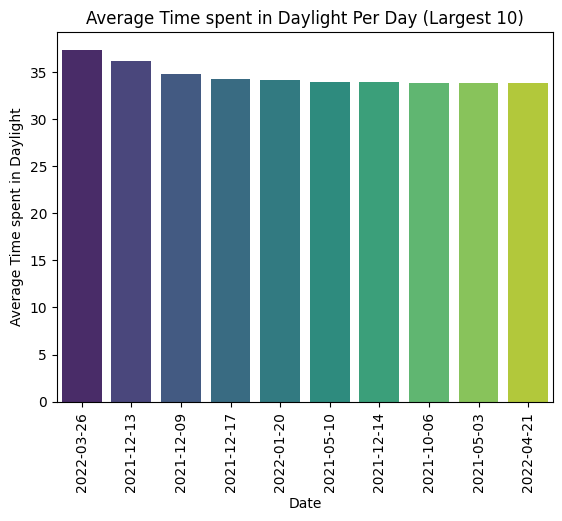

In [124]:
sns.barplot(data = largest_ten_daylight, x = 'creationDate', y = 'value', hue = 'creationDate', legend = False, palette= "viridis")
plt.title('Average Time spent in Daylight Per Day (Largest 10)')
plt.xlabel('Date')
plt.ylabel('Average Time spent in Daylight')
plt.xticks(rotation = 90)
plt.figure(figsize=(12, 8))
plt.close()
plt.show()

#Get rows with Heart Rate Variability

In [125]:
heartRate = records_df[records_df['type'] == 'HKQuantityTypeIdentifierHeartRateVariabilitySDNN']
heartRate

,type,sourceName,unit,creationDate,startDate,endDate,value,device
909455,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,Jannah’s Apple Watch,ms,2023-09-17 10:48:41 -0500,2023-09-17 10:47:40 -0500,2023-09-17 10:48:35 -0500,195.918,"Watch6,14"
909456,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,Jannah’s Apple Watch,ms,2023-09-17 15:26:14 -0500,2023-09-17 15:25:13 -0500,2023-09-17 15:26:13 -0500,147.235,"Watch6,14"
909457,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,Jannah’s Apple Watch,ms,2023-09-17 18:55:03 -0500,2023-09-17 18:54:02 -0500,2023-09-17 18:55:01 -0500,148.095,"Watch6,14"
909458,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,Jannah’s Apple Watch,ms,2023-09-18 00:12:19 -0500,2023-09-18 00:11:18 -0500,2023-09-18 00:12:17 -0500,166.914,"Watch6,14"
909459,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,Jannah’s Apple Watch,ms,2023-09-18 02:23:54 -0500,2023-09-18 02:22:53 -0500,2023-09-18 02:23:53 -0500,79.9569,"Watch6,14"
...,...,...,...,...,...,...,...,...
911267,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,Jannah’s Apple Watch,ms,2025-02-25 21:29:58 -0500,2025-02-25 21:28:57 -0500,2025-02-25 21:29:54 -0500,144.231,"Watch6,10"
911268,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,Jannah’s Apple Watch,ms,2025-02-26 06:45:04 -0500,2025-02-26 06:44:03 -0500,2025-02-26 06:45:03 -0500,120.072,"Watch6,10"
911269,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,Jannah’s Apple Watch,ms,2025-02-26 07:57:41 -0500,2025-02-26 07:56:40 -0500,2025-02-26 07:57:39 -0500,38.8269,"Watch6,10"
911270,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,Jannah’s Apple Watch,ms,2025-02-26 13:43:06 -0500,2025-02-26 13:42:05 -0500,2025-02-26 13:43:04 -0500,39.7098,"Watch6,10"


#If you don't workout, this level would be stressful. But I think that this is good for someone who worksout consistently.

In [126]:
heartRate['value'] = pd.to_numeric(heartRate['value'], errors='coerce')
heartRate_all_time = np.mean(heartRate['value'])
heartRate_all_time

<ipython-input-126-8de4f8682c99>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heartRate['value'] = pd.to_numeric(heartRate['value'], errors='coerce')


97.62904865162355

In [127]:
heartRate['creationDate'] = pd.to_datetime(heartRate['creationDate']).dt.date
heartRate_per_day = heartRate.groupby('creationDate')['value'].mean()
heartRate_per_day

<ipython-input-127-ab82aa359b17>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heartRate['creationDate'] = pd.to_datetime(heartRate['creationDate']).dt.date


,value
creationDate,
2023-09-17,163.749333
2023-09-18,104.862386
2023-09-19,109.575417
2023-09-20,104.425250
2023-09-21,101.039750
...,...
2025-02-22,83.224133
2025-02-23,93.119400
2025-02-24,90.432667


#I think highest heart rate variability is when you are competing

In [128]:
heartRate_per_day = heartRate_per_day.to_frame()
largest_ten_heartRate = heartRate_per_day.nlargest(10, 'value')
largest_ten_heartRate

,value
creationDate,
2023-09-22,190.811233
2024-02-09,185.082000
2024-06-15,178.744000
2023-10-22,168.788000
2024-09-16,165.260000
2025-01-28,163.776000
2023-09-17,163.749333
2024-10-01,163.476500
2024-05-09,162.080600


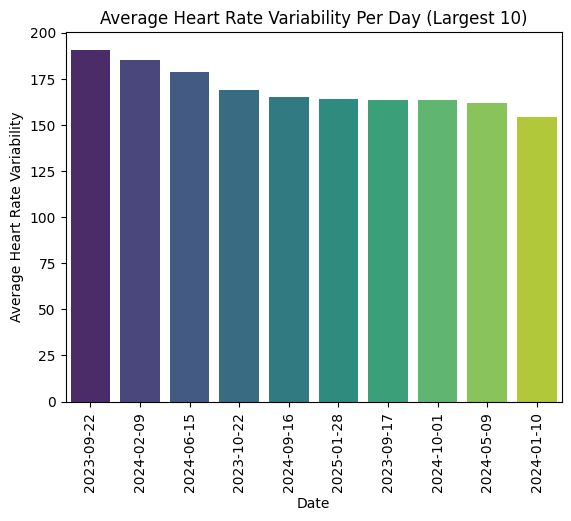

In [129]:
sns.barplot(data = largest_ten_heartRate, x = 'creationDate', y = 'value', hue = 'creationDate', legend = False, palette= "viridis")
plt.title('Average Heart Rate Variability Per Day (Largest 10)')
plt.xlabel('Date')
plt.ylabel('Average Heart Rate Variability')
plt.xticks(rotation = 90)
plt.figure(figsize=(12, 8))
plt.close()
plt.show()

#Adding new features and converting old ones so maybe I can use it in PowerBI and for a correlation matrix

In [130]:
records_df.drop(columns=['sourceName'], inplace=True)
records_df

,type,unit,creationDate,startDate,endDate,value,device
13,HKQuantityTypeIdentifierHeartRate,count/min,2023-09-17 10:44:10 -0500,2023-09-17 10:42:00 -0500,2023-09-17 10:42:00 -0500,71,"Watch6,14"
14,HKQuantityTypeIdentifierHeartRate,count/min,2023-09-17 10:45:48 -0500,2023-09-17 10:45:47 -0500,2023-09-17 10:45:47 -0500,104,"Watch6,14"
15,HKQuantityTypeIdentifierHeartRate,count/min,2023-09-17 10:48:58 -0500,2023-09-17 10:47:40 -0500,2023-09-17 10:47:40 -0500,63.4445,"Watch6,14"
16,HKQuantityTypeIdentifierHeartRate,count/min,2023-09-17 10:50:02 -0500,2023-09-17 10:47:48 -0500,2023-09-17 10:47:48 -0500,55,"Watch6,14"
17,HKQuantityTypeIdentifierHeartRate,count/min,2023-09-17 10:57:10 -0500,2023-09-17 10:56:18 -0500,2023-09-17 10:56:18 -0500,106,"Watch6,14"
...,...,...,...,...,...,...,...
911267,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,ms,2025-02-25 21:29:58 -0500,2025-02-25 21:28:57 -0500,2025-02-25 21:29:54 -0500,144.231,"Watch6,10"
911268,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,ms,2025-02-26 06:45:04 -0500,2025-02-26 06:44:03 -0500,2025-02-26 06:45:03 -0500,120.072,"Watch6,10"
911269,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,ms,2025-02-26 07:57:41 -0500,2025-02-26 07:56:40 -0500,2025-02-26 07:57:39 -0500,38.8269,"Watch6,10"
911270,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,ms,2025-02-26 13:43:06 -0500,2025-02-26 13:42:05 -0500,2025-02-26 13:43:04 -0500,39.7098,"Watch6,10"


In [131]:
records_df['creationYear'] = pd.to_datetime(records_df['creationDate']).dt.year
records_df['creationMonth'] = pd.to_datetime(records_df['creationDate']).dt.month
records_df['creationDay'] = pd.to_datetime(records_df['creationDate']).dt.day

records_df['startYear'] = pd.to_datetime(records_df['startDate']).dt.year
records_df['startMonth'] = pd.to_datetime(records_df['startDate']).dt.month
records_df['startDay'] = pd.to_datetime(records_df['startDate']).dt.day

records_df['endYear'] = pd.to_datetime(records_df['endDate']).dt.year
records_df['endMonth'] = pd.to_datetime(records_df['endDate']).dt.month
records_df['endDay'] = pd.to_datetime(records_df['endDate']).dt.day

records_df

,type,unit,creationDate,startDate,endDate,value,device,creationYear,creationMonth,creationDay,startYear,startMonth,startDay,endYear,endMonth,endDay
13,HKQuantityTypeIdentifierHeartRate,count/min,2023-09-17 10:44:10 -0500,2023-09-17 10:42:00 -0500,2023-09-17 10:42:00 -0500,71,"Watch6,14",2023,9,17,2023,9,17,2023,9,17
14,HKQuantityTypeIdentifierHeartRate,count/min,2023-09-17 10:45:48 -0500,2023-09-17 10:45:47 -0500,2023-09-17 10:45:47 -0500,104,"Watch6,14",2023,9,17,2023,9,17,2023,9,17
15,HKQuantityTypeIdentifierHeartRate,count/min,2023-09-17 10:48:58 -0500,2023-09-17 10:47:40 -0500,2023-09-17 10:47:40 -0500,63.4445,"Watch6,14",2023,9,17,2023,9,17,2023,9,17
16,HKQuantityTypeIdentifierHeartRate,count/min,2023-09-17 10:50:02 -0500,2023-09-17 10:47:48 -0500,2023-09-17 10:47:48 -0500,55,"Watch6,14",2023,9,17,2023,9,17,2023,9,17
17,HKQuantityTypeIdentifierHeartRate,count/min,2023-09-17 10:57:10 -0500,2023-09-17 10:56:18 -0500,2023-09-17 10:56:18 -0500,106,"Watch6,14",2023,9,17,2023,9,17,2023,9,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
911267,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,ms,2025-02-25 21:29:58 -0500,2025-02-25 21:28:57 -0500,2025-02-25 21:29:54 -0500,144.231,"Watch6,10",2025,2,25,2025,2,25,2025,2,25
911268,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,ms,2025-02-26 06:45:04 -0500,2025-02-26 06:44:03 -0500,2025-02-26 06:45:03 -0500,120.072,"Watch6,10",2025,2,26,2025,2,26,2025,2,26
911269,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,ms,2025-02-26 07:57:41 -0500,2025-02-26 07:56:40 -0500,2025-02-26 07:57:39 -0500,38.8269,"Watch6,10",2025,2,26,2025,2,26,2025,2,26
911270,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,ms,2025-02-26 13:43:06 -0500,2025-02-26 13:42:05 -0500,2025-02-26 13:43:04 -0500,39.7098,"Watch6,10",2025,2,26,2025,2,26,2025,2,26


In [132]:
records_df['creationDate'] = pd.to_datetime(records_df['creationDate']).dt.tz_localize(None)

records_df

,type,unit,creationDate,startDate,endDate,value,device,creationYear,creationMonth,creationDay,startYear,startMonth,startDay,endYear,endMonth,endDay
13,HKQuantityTypeIdentifierHeartRate,count/min,2023-09-17 10:44:10,2023-09-17 10:42:00 -0500,2023-09-17 10:42:00 -0500,71,"Watch6,14",2023,9,17,2023,9,17,2023,9,17
14,HKQuantityTypeIdentifierHeartRate,count/min,2023-09-17 10:45:48,2023-09-17 10:45:47 -0500,2023-09-17 10:45:47 -0500,104,"Watch6,14",2023,9,17,2023,9,17,2023,9,17
15,HKQuantityTypeIdentifierHeartRate,count/min,2023-09-17 10:48:58,2023-09-17 10:47:40 -0500,2023-09-17 10:47:40 -0500,63.4445,"Watch6,14",2023,9,17,2023,9,17,2023,9,17
16,HKQuantityTypeIdentifierHeartRate,count/min,2023-09-17 10:50:02,2023-09-17 10:47:48 -0500,2023-09-17 10:47:48 -0500,55,"Watch6,14",2023,9,17,2023,9,17,2023,9,17
17,HKQuantityTypeIdentifierHeartRate,count/min,2023-09-17 10:57:10,2023-09-17 10:56:18 -0500,2023-09-17 10:56:18 -0500,106,"Watch6,14",2023,9,17,2023,9,17,2023,9,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
911267,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,ms,2025-02-25 21:29:58,2025-02-25 21:28:57 -0500,2025-02-25 21:29:54 -0500,144.231,"Watch6,10",2025,2,25,2025,2,25,2025,2,25
911268,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,ms,2025-02-26 06:45:04,2025-02-26 06:44:03 -0500,2025-02-26 06:45:03 -0500,120.072,"Watch6,10",2025,2,26,2025,2,26,2025,2,26
911269,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,ms,2025-02-26 07:57:41,2025-02-26 07:56:40 -0500,2025-02-26 07:57:39 -0500,38.8269,"Watch6,10",2025,2,26,2025,2,26,2025,2,26
911270,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,ms,2025-02-26 13:43:06,2025-02-26 13:42:05 -0500,2025-02-26 13:43:04 -0500,39.7098,"Watch6,10",2025,2,26,2025,2,26,2025,2,26


In [133]:
records_df['startDate'] = pd.to_datetime(records_df['startDate']).dt.tz_localize(None)
records_df['endDate'] = pd.to_datetime(records_df['endDate']).dt.tz_localize(None)
records_df

,type,unit,creationDate,startDate,endDate,value,device,creationYear,creationMonth,creationDay,startYear,startMonth,startDay,endYear,endMonth,endDay
13,HKQuantityTypeIdentifierHeartRate,count/min,2023-09-17 10:44:10,2023-09-17 10:42:00,2023-09-17 10:42:00,71,"Watch6,14",2023,9,17,2023,9,17,2023,9,17
14,HKQuantityTypeIdentifierHeartRate,count/min,2023-09-17 10:45:48,2023-09-17 10:45:47,2023-09-17 10:45:47,104,"Watch6,14",2023,9,17,2023,9,17,2023,9,17
15,HKQuantityTypeIdentifierHeartRate,count/min,2023-09-17 10:48:58,2023-09-17 10:47:40,2023-09-17 10:47:40,63.4445,"Watch6,14",2023,9,17,2023,9,17,2023,9,17
16,HKQuantityTypeIdentifierHeartRate,count/min,2023-09-17 10:50:02,2023-09-17 10:47:48,2023-09-17 10:47:48,55,"Watch6,14",2023,9,17,2023,9,17,2023,9,17
17,HKQuantityTypeIdentifierHeartRate,count/min,2023-09-17 10:57:10,2023-09-17 10:56:18,2023-09-17 10:56:18,106,"Watch6,14",2023,9,17,2023,9,17,2023,9,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
911267,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,ms,2025-02-25 21:29:58,2025-02-25 21:28:57,2025-02-25 21:29:54,144.231,"Watch6,10",2025,2,25,2025,2,25,2025,2,25
911268,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,ms,2025-02-26 06:45:04,2025-02-26 06:44:03,2025-02-26 06:45:03,120.072,"Watch6,10",2025,2,26,2025,2,26,2025,2,26
911269,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,ms,2025-02-26 07:57:41,2025-02-26 07:56:40,2025-02-26 07:57:39,38.8269,"Watch6,10",2025,2,26,2025,2,26,2025,2,26
911270,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,ms,2025-02-26 13:43:06,2025-02-26 13:42:05,2025-02-26 13:43:04,39.7098,"Watch6,10",2025,2,26,2025,2,26,2025,2,26


In [134]:
records_df.dtypes

,0
type,object
unit,object
creationDate,datetime64[ns]
startDate,datetime64[ns]
endDate,datetime64[ns]
value,object
device,object
creationYear,int32
creationMonth,int32
creationDay,int32


In [135]:
records_df['value'] = pd.to_numeric(records_df['value'], errors='coerce')
records_df

,type,unit,creationDate,startDate,endDate,value,device,creationYear,creationMonth,creationDay,startYear,startMonth,startDay,endYear,endMonth,endDay
13,HKQuantityTypeIdentifierHeartRate,count/min,2023-09-17 10:44:10,2023-09-17 10:42:00,2023-09-17 10:42:00,71.0000,"Watch6,14",2023,9,17,2023,9,17,2023,9,17
14,HKQuantityTypeIdentifierHeartRate,count/min,2023-09-17 10:45:48,2023-09-17 10:45:47,2023-09-17 10:45:47,104.0000,"Watch6,14",2023,9,17,2023,9,17,2023,9,17
15,HKQuantityTypeIdentifierHeartRate,count/min,2023-09-17 10:48:58,2023-09-17 10:47:40,2023-09-17 10:47:40,63.4445,"Watch6,14",2023,9,17,2023,9,17,2023,9,17
16,HKQuantityTypeIdentifierHeartRate,count/min,2023-09-17 10:50:02,2023-09-17 10:47:48,2023-09-17 10:47:48,55.0000,"Watch6,14",2023,9,17,2023,9,17,2023,9,17
17,HKQuantityTypeIdentifierHeartRate,count/min,2023-09-17 10:57:10,2023-09-17 10:56:18,2023-09-17 10:56:18,106.0000,"Watch6,14",2023,9,17,2023,9,17,2023,9,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
911267,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,ms,2025-02-25 21:29:58,2025-02-25 21:28:57,2025-02-25 21:29:54,144.2310,"Watch6,10",2025,2,25,2025,2,25,2025,2,25
911268,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,ms,2025-02-26 06:45:04,2025-02-26 06:44:03,2025-02-26 06:45:03,120.0720,"Watch6,10",2025,2,26,2025,2,26,2025,2,26
911269,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,ms,2025-02-26 07:57:41,2025-02-26 07:56:40,2025-02-26 07:57:39,38.8269,"Watch6,10",2025,2,26,2025,2,26,2025,2,26
911270,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,ms,2025-02-26 13:43:06,2025-02-26 13:42:05,2025-02-26 13:43:04,39.7098,"Watch6,10",2025,2,26,2025,2,26,2025,2,26


In [136]:
records_df.dtypes

,0
type,object
unit,object
creationDate,datetime64[ns]
startDate,datetime64[ns]
endDate,datetime64[ns]
value,float64
device,object
creationYear,int32
creationMonth,int32
creationDay,int32


In [137]:
records_df['type'].unique()

array(['HKQuantityTypeIdentifierHeartRate',
       'HKQuantityTypeIdentifierRespiratoryRate',
       'HKQuantityTypeIdentifierStepCount',
       'HKQuantityTypeIdentifierDistanceWalkingRunning',
       'HKQuantityTypeIdentifierBasalEnergyBurned',
       'HKQuantityTypeIdentifierActiveEnergyBurned',
       'HKQuantityTypeIdentifierFlightsClimbed',
       'HKQuantityTypeIdentifierAppleExerciseTime',
       'HKQuantityTypeIdentifierDistanceCycling',
       'HKQuantityTypeIdentifierDistanceSwimming',
       'HKQuantityTypeIdentifierSwimmingStrokeCount',
       'HKQuantityTypeIdentifierEnvironmentalAudioExposure',
       'HKQuantityTypeIdentifierWalkingDoubleSupportPercentage',
       'HKQuantityTypeIdentifierWalkingSpeed',
       'HKQuantityTypeIdentifierWalkingStepLength',
       'HKQuantityTypeIdentifierWalkingAsymmetryPercentage',
       'HKQuantityTypeIdentifierAppleWalkingSteadiness',
       'HKQuantityTypeIdentifierTimeInDaylight',
       'HKQuantityTypeIdentifierHeartRateVariability

In [138]:
records_df['creationHour'] = pd.to_datetime(records_df['creationDate']).dt.hour
records_df

,type,unit,creationDate,startDate,endDate,value,device,creationYear,creationMonth,creationDay,startYear,startMonth,startDay,endYear,endMonth,endDay,creationHour
13,HKQuantityTypeIdentifierHeartRate,count/min,2023-09-17 10:44:10,2023-09-17 10:42:00,2023-09-17 10:42:00,71.0000,"Watch6,14",2023,9,17,2023,9,17,2023,9,17,10
14,HKQuantityTypeIdentifierHeartRate,count/min,2023-09-17 10:45:48,2023-09-17 10:45:47,2023-09-17 10:45:47,104.0000,"Watch6,14",2023,9,17,2023,9,17,2023,9,17,10
15,HKQuantityTypeIdentifierHeartRate,count/min,2023-09-17 10:48:58,2023-09-17 10:47:40,2023-09-17 10:47:40,63.4445,"Watch6,14",2023,9,17,2023,9,17,2023,9,17,10
16,HKQuantityTypeIdentifierHeartRate,count/min,2023-09-17 10:50:02,2023-09-17 10:47:48,2023-09-17 10:47:48,55.0000,"Watch6,14",2023,9,17,2023,9,17,2023,9,17,10
17,HKQuantityTypeIdentifierHeartRate,count/min,2023-09-17 10:57:10,2023-09-17 10:56:18,2023-09-17 10:56:18,106.0000,"Watch6,14",2023,9,17,2023,9,17,2023,9,17,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
911267,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,ms,2025-02-25 21:29:58,2025-02-25 21:28:57,2025-02-25 21:29:54,144.2310,"Watch6,10",2025,2,25,2025,2,25,2025,2,25,21
911268,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,ms,2025-02-26 06:45:04,2025-02-26 06:44:03,2025-02-26 06:45:03,120.0720,"Watch6,10",2025,2,26,2025,2,26,2025,2,26,6
911269,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,ms,2025-02-26 07:57:41,2025-02-26 07:56:40,2025-02-26 07:57:39,38.8269,"Watch6,10",2025,2,26,2025,2,26,2025,2,26,7
911270,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,ms,2025-02-26 13:43:06,2025-02-26 13:42:05,2025-02-26 13:43:04,39.7098,"Watch6,10",2025,2,26,2025,2,26,2025,2,26,13


In [139]:
records_df['startDateHour'] = pd.to_datetime(records_df['startDate']).dt.hour
records_df['endDateHour'] = pd.to_datetime(records_df['endDate']).dt.hour
records_df

,type,unit,creationDate,startDate,endDate,value,device,creationYear,creationMonth,creationDay,startYear,startMonth,startDay,endYear,endMonth,endDay,creationHour,startDateHour,endDateHour
13,HKQuantityTypeIdentifierHeartRate,count/min,2023-09-17 10:44:10,2023-09-17 10:42:00,2023-09-17 10:42:00,71.0000,"Watch6,14",2023,9,17,2023,9,17,2023,9,17,10,10,10
14,HKQuantityTypeIdentifierHeartRate,count/min,2023-09-17 10:45:48,2023-09-17 10:45:47,2023-09-17 10:45:47,104.0000,"Watch6,14",2023,9,17,2023,9,17,2023,9,17,10,10,10
15,HKQuantityTypeIdentifierHeartRate,count/min,2023-09-17 10:48:58,2023-09-17 10:47:40,2023-09-17 10:47:40,63.4445,"Watch6,14",2023,9,17,2023,9,17,2023,9,17,10,10,10
16,HKQuantityTypeIdentifierHeartRate,count/min,2023-09-17 10:50:02,2023-09-17 10:47:48,2023-09-17 10:47:48,55.0000,"Watch6,14",2023,9,17,2023,9,17,2023,9,17,10,10,10
17,HKQuantityTypeIdentifierHeartRate,count/min,2023-09-17 10:57:10,2023-09-17 10:56:18,2023-09-17 10:56:18,106.0000,"Watch6,14",2023,9,17,2023,9,17,2023,9,17,10,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
911267,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,ms,2025-02-25 21:29:58,2025-02-25 21:28:57,2025-02-25 21:29:54,144.2310,"Watch6,10",2025,2,25,2025,2,25,2025,2,25,21,21,21
911268,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,ms,2025-02-26 06:45:04,2025-02-26 06:44:03,2025-02-26 06:45:03,120.0720,"Watch6,10",2025,2,26,2025,2,26,2025,2,26,6,6,6
911269,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,ms,2025-02-26 07:57:41,2025-02-26 07:56:40,2025-02-26 07:57:39,38.8269,"Watch6,10",2025,2,26,2025,2,26,2025,2,26,7,7,7
911270,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,ms,2025-02-26 13:43:06,2025-02-26 13:42:05,2025-02-26 13:43:04,39.7098,"Watch6,10",2025,2,26,2025,2,26,2025,2,26,13,13,13


In [147]:
records_df['type'].unique()

array(['HKQuantityTypeIdentifierHeartRate',
       'HKQuantityTypeIdentifierRespiratoryRate',
       'HKQuantityTypeIdentifierStepCount',
       'HKQuantityTypeIdentifierDistanceWalkingRunning',
       'HKQuantityTypeIdentifierBasalEnergyBurned',
       'HKQuantityTypeIdentifierActiveEnergyBurned',
       'HKQuantityTypeIdentifierFlightsClimbed',
       'HKQuantityTypeIdentifierAppleExerciseTime',
       'HKQuantityTypeIdentifierDistanceCycling',
       'HKQuantityTypeIdentifierDistanceSwimming',
       'HKQuantityTypeIdentifierSwimmingStrokeCount',
       'HKQuantityTypeIdentifierEnvironmentalAudioExposure',
       'HKQuantityTypeIdentifierWalkingDoubleSupportPercentage',
       'HKQuantityTypeIdentifierWalkingSpeed',
       'HKQuantityTypeIdentifierWalkingStepLength',
       'HKQuantityTypeIdentifierWalkingAsymmetryPercentage',
       'HKQuantityTypeIdentifierAppleWalkingSteadiness',
       'HKQuantityTypeIdentifierTimeInDaylight',
       'HKQuantityTypeIdentifierHeartRateVariability

In [140]:
newDataframe = pd.DataFrame() #initialize empty dataframe
for type in records_df['type'].unique():
  toRemove = 'HKQuantityTypeIdentifier'
  result = toRemove.replace('HKQuantityTypeIdentifier', '')
  result = records_df[records_df['type'] == type]
  result = result.groupby(['creationYear', 'creationMonth', 'creationDay']).agg({
    'type': 'first',
    'unit': 'first',
    'creationDate' :'first',
    'startDate' :'first',
    'endDate' :'first',
    'value': 'mean',  # Average the heart rate values,
    'device' : 'first',
    'startYear' : 'first',
    'startMonth' : 'first',
    'startDay' : 'first',
    'endYear' : 'first',
    'endMonth' : 'first',
    'endDay' : 'first',
    'creationHour': 'first',
    'startDateHour': 'first',
    'endDateHour': 'first'}).reset_index()
newDataframe = pd.concat([newDataframe, result])

In [146]:
newDataframe

,creationYear,creationMonth,creationDay,type,unit,creationDate,startDate,endDate,value,device,startYear,startMonth,startDay,endYear,endMonth,endDay,creationHour,startDateHour,endDateHour,timeOfDay
0,2023,9,17,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,ms,2023-09-17 10:48:41,2023-09-17 10:47:40,2023-09-17 10:48:35,163.749333,"Watch6,14",2023,9,17,2023,9,17,10,10,10,Morning
1,2023,9,18,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,ms,2023-09-18 00:12:19,2023-09-18 00:11:18,2023-09-18 00:12:17,104.862386,"Watch6,14",2023,9,18,2023,9,18,0,0,0,Morning
2,2023,9,19,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,ms,2023-09-19 02:23:53,2023-09-19 02:22:52,2023-09-19 02:23:52,109.575417,"Watch6,14",2023,9,19,2023,9,19,2,2,2,Morning
3,2023,9,20,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,ms,2023-09-20 02:23:53,2023-09-20 02:22:52,2023-09-20 02:23:51,104.425250,"Watch6,14",2023,9,20,2023,9,20,2,2,2,Morning
4,2023,9,21,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,ms,2023-09-21 02:23:53,2023-09-21 02:22:52,2023-09-21 02:23:52,101.039750,"Watch6,14",2023,9,21,2023,9,21,2,2,2,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380,2025,2,22,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,ms,2025-02-22 03:02:14,2025-02-22 03:01:13,2025-02-22 03:02:12,83.224133,"Watch6,10",2025,2,22,2025,2,22,3,3,3,Morning
381,2025,2,23,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,ms,2025-02-23 03:03:35,2025-02-23 03:02:34,2025-02-23 03:03:34,93.119400,"Watch6,10",2025,2,23,2025,2,23,3,3,3,Morning
382,2025,2,24,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,ms,2025-02-24 06:43:34,2025-02-24 06:42:33,2025-02-24 06:43:33,90.432667,"Watch6,10",2025,2,24,2025,2,24,6,6,6,Morning
383,2025,2,25,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,ms,2025-02-25 07:40:11,2025-02-25 07:39:10,2025-02-25 07:40:09,82.634000,"Watch6,10",2025,2,25,2025,2,25,7,7,7,Morning


In [142]:
for i in newDataframe['creationHour']:
  if i >= 0 and i <= 11:
    newDataframe['timeOfDay'] = 'Morning'
  elif i >= 12 and i <= 16:
    newDataframe['timeOfDay'] = 'Afternoon'
  elif i >= 17 and i <= 20:
    newDataframe['timeOfDay'] = 'Evening'
  else:
    newDataframe['timeOfDay'] = 'Night'
newDataframe

,creationYear,creationMonth,creationDay,type,unit,creationDate,startDate,endDate,value,device,startYear,startMonth,startDay,endYear,endMonth,endDay,creationHour,startDateHour,endDateHour,timeOfDay
0,2023,9,17,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,ms,2023-09-17 10:48:41,2023-09-17 10:47:40,2023-09-17 10:48:35,163.749333,"Watch6,14",2023,9,17,2023,9,17,10,10,10,Morning
1,2023,9,18,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,ms,2023-09-18 00:12:19,2023-09-18 00:11:18,2023-09-18 00:12:17,104.862386,"Watch6,14",2023,9,18,2023,9,18,0,0,0,Morning
2,2023,9,19,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,ms,2023-09-19 02:23:53,2023-09-19 02:22:52,2023-09-19 02:23:52,109.575417,"Watch6,14",2023,9,19,2023,9,19,2,2,2,Morning
3,2023,9,20,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,ms,2023-09-20 02:23:53,2023-09-20 02:22:52,2023-09-20 02:23:51,104.425250,"Watch6,14",2023,9,20,2023,9,20,2,2,2,Morning
4,2023,9,21,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,ms,2023-09-21 02:23:53,2023-09-21 02:22:52,2023-09-21 02:23:52,101.039750,"Watch6,14",2023,9,21,2023,9,21,2,2,2,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380,2025,2,22,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,ms,2025-02-22 03:02:14,2025-02-22 03:01:13,2025-02-22 03:02:12,83.224133,"Watch6,10",2025,2,22,2025,2,22,3,3,3,Morning
381,2025,2,23,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,ms,2025-02-23 03:03:35,2025-02-23 03:02:34,2025-02-23 03:03:34,93.119400,"Watch6,10",2025,2,23,2025,2,23,3,3,3,Morning
382,2025,2,24,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,ms,2025-02-24 06:43:34,2025-02-24 06:42:33,2025-02-24 06:43:33,90.432667,"Watch6,10",2025,2,24,2025,2,24,6,6,6,Morning
383,2025,2,25,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,ms,2025-02-25 07:40:11,2025-02-25 07:39:10,2025-02-25 07:40:09,82.634000,"Watch6,10",2025,2,25,2025,2,25,7,7,7,Morning


#Correlation Matrix

In [ ]:
numeric_df = records_df.select_dtypes(include=['number'])
matrix = numeric_df.corr()

# plotting correlation matrix
plt.imshow(matrix, cmap='Blues')

# adding colorbar
plt.colorbar()

# extracting variable names
variables = []
for i in matrix.columns:
    variables.append(i)

# Adding labels to the matrix
plt.xticks(range(len(matrix)), variables, rotation=45, ha='right')
plt.yticks(range(len(matrix)), variables)

# Display the plot
plt.show()

In [ ]:
#records_df.to_excel("records.xlsx", index=False)

# Grab the unique record statistics for each day!

In [ ]:
records_df['type'].unique()

In [ ]:
newDataframe = pd.DataFrame() #initialize empty dataframe
for type in records_df['type'].unique():
  toRemove = 'HKQuantityTypeIdentifier'
  result = toRemove.replace('HKQuantityTypeIdentifier', '')
  result = records_df[records_df['type'] == type]
  result = result.groupby(['creationYear', 'creationMonth', 'creationDay']).agg({
    'type': 'first',
    'unit': 'first',
    'creationDate' :'first',
    'startDate' :'first',
    'endDate' :'first',
    'value': 'mean',  # Average the heart rate values,
    'device' : 'first',
    'startYear' : 'first',
    'startMonth' : 'first',
    'startDay' : 'first',
    'endYear' : 'first',
    'endMonth' : 'first',
    'endDay' : 'first',}).reset_index()
  newDataframe = pd.concat([newDataframe, result])

#respritoryRate_dataframe = records_df[records_df['type'] == 'HKQuantityTypeIdentifierRespiratoryRate']
#respritoryRate_dataframe = respritoryRate_dataframe.groupby(['creationYear', 'creationMonth', 'creationDay']).agg({
#    'type': 'first',
#    'unit': 'first',
#    'creationDate' :'first',
#    'startDate' :'first',
#    'endDate' :'first',
#    'value': 'mean',  # Average the heart rate values,
#    'device' : 'first',
#    'startYear' : 'first',
#    'startMonth' : 'first',
#    'startDay' : 'first',
#    'endYear' : 'first',
#    'endMonth' : 'first',
#    'endDay' : 'first',
#}).reset_index()
newDataframe

In [ ]:
newDataframe.to_excel("UniqueRecordsEachDay.xlsx", index=False)

#Look into later, build an ML model

#Look at Activity Table

In [ ]:
activity_summary_df

#Good, no null values

In [ ]:
activity_summary_df.isnull().sum()

In [ ]:
activity_summary_df.dtypes

#Add new feature (boolean: did you meet goal)

In [ ]:
activity_summary_df['activeEnergyBurned'] = pd.to_numeric(activity_summary_df['activeEnergyBurned'], errors='coerce')
activity_summary_df['activeEnergyBurnedGoal'] = pd.to_numeric(activity_summary_df['activeEnergyBurnedGoal'], errors='coerce')

In [ ]:
activity_summary_df['met_energy_goal'] = activity_summary_df['activeEnergyBurned'] >= activity_summary_df['activeEnergyBurnedGoal']
activity_summary_df

#Count how many times energy goals have been met and plot it in a pie chart

In [ ]:
met_goal = activity_summary_df['met_energy_goal'].value_counts()
met_goal

In [ ]:
plotGoal = met_goal.plot.pie(y='count', figsize=(10, 10), autopct='%1.1f%%')
plt.ylabel('')
plt.xlabel('')
plt.title('How many times did Jannah meet her Energy goals')
plt.show()

#Yikes, you need to move more and meet your energy goals

#Analyze how much time Jojo moves

In [ ]:
activity_summary_df.dtypes

In [ ]:
activity_summary_df['dateComponents'] = pd.to_datetime(activity_summary_df['dateComponents']).dt.date

In [ ]:
averageCaloriesBurned = activity_summary_df.groupby('dateComponents')['activeEnergyBurned'].mean()
averageCaloriesBurned

#Dang Jannah, what kind of drugs were you on to butn that many calories on 09/07/2024?!!!

In [ ]:
largest_ten_caloriesBurned = averageCaloriesBurned.nlargest(10)
largest_ten_caloriesBurned

In [ ]:
largest_ten_caloriesBurned = largest_ten_caloriesBurned.to_frame()

In [ ]:
sns.barplot(data = largest_ten_caloriesBurned, x = 'dateComponents', y = 'activeEnergyBurned', hue = 'dateComponents', legend = False, palette= "viridis")
plt.title('Average Calories Burned Per Day (Largest 10)')
plt.xlabel('Date')
plt.ylabel('Average Calories Burned Per Day')
plt.xticks(rotation = 90)
plt.figure(figsize=(12, 8))
plt.close()

#See what unique values exist to see if further analysis is needed here

In [ ]:
activity_summary_df.dtypes

In [ ]:
activity_summary_df['appleMoveTime'].unique()

In [ ]:
activity_summary_df['activeEnergyBurnedUnit'].unique()

In [ ]:
activity_summary_df['appleMoveTime'].unique()

In [ ]:
activity_summary_df['appleMoveTimeGoal'].unique()

In [ ]:
activity_summary_df['appleExerciseTime'].unique()

In [ ]:
activity_summary_df['appleExerciseTimeGoal'].unique()

In [ ]:
activity_summary_df['appleStandHours'].unique()

In [ ]:
activity_summary_df['appleStandHoursGoal'].unique()

#Add more Boolean Variables Rows

**Convert columns to numeric values**

In [ ]:
activity_summary_df['appleExerciseTime'] = pd.to_numeric(activity_summary_df['appleExerciseTime'], errors='coerce')
activity_summary_df['appleExerciseTimeGoal'] = pd.to_numeric(activity_summary_df['appleExerciseTimeGoal'], errors='coerce')
activity_summary_df['appleStandHours'] = pd.to_numeric(activity_summary_df['appleStandHours'], errors='coerce')
activity_summary_df['appleStandHoursGoal'] = pd.to_numeric(activity_summary_df['appleStandHoursGoal'], errors='coerce')

In [ ]:
activity_summary_df['met_Apple_Exercise_Time'] = activity_summary_df['appleExerciseTime'] >= activity_summary_df['appleExerciseTimeGoal']
activity_summary_df['met_Apple_Stand_Hours'] = activity_summary_df['appleStandHours'] >= activity_summary_df['appleStandHoursGoal']
activity_summary_df

In [ ]:
met_Apple_Exercise_Time = activity_summary_df['met_Apple_Exercise_Time'].value_counts()
met_Apple_Exercise_Time

In [ ]:
plotGoal = met_Apple_Exercise_Time.plot.pie(y='count', figsize=(10, 10), autopct='%1.1f%%')
plt.ylabel('')
plt.xlabel('')
plt.title('How many times did Jannah meet her Apple Exercise Time')
plt.show()

#Good Job Jannah, there has been some improvements!!!

In [ ]:
met_Apple_Stand_Hours = activity_summary_df['met_Apple_Stand_Hours'].value_counts()
met_Apple_Stand_Hours

In [ ]:
plotGoal = met_Apple_Stand_Hours.plot.pie(y='count', figsize=(10, 10), autopct='%1.1f%%')
plt.ylabel('')
plt.xlabel('')
plt.title('How many times did Jannah meet her Apple Stand Hours')
plt.show()

#Good job JOJO!!! At least you standing up right!

In [ ]:
activity_summary_df

In [ ]:
activity_summary_df.dtypes

In [ ]:
activity_summary_df['appleMoveTimeGoal'] = pd.to_numeric(activity_summary_df['appleMoveTimeGoal'], errors='coerce')
activity_summary_df['appleMoveTime'] = pd.to_numeric(activity_summary_df['appleMoveTime'], errors='coerce')
activity_summary_df

In [ ]:
activity_summary_df['appleMoveTimeGoal'].unique()

In [ ]:
activity_summary_df['appleMoveTime'].unique()

In [ ]:
activity_summary_df.drop(columns=['appleMoveTimeGoal', 'appleMoveTime'], inplace=True)
activity_summary_df

In [ ]:
activity_summary_df['dateComponents'] = pd.to_datetime(activity_summary_df['dateComponents']).dt.tz_localize(None)
activity_summary_df.dtypes

In [ ]:
activity_summary_df

In [ ]:
#activity_summary_df.to_excel("activities.xlsx", index=False)

#Look into later. Build a model

#Explore Workout Table

In [ ]:
workouts_df

#Do the same reg ex manipulation as above for device

In [ ]:
workouts_expanded = workouts_df['device'].str.extract(r'hardware:([\w\d,]+)')
workouts_expanded = workouts_expanded[0].str.rstrip(',')
workouts_expanded

In [ ]:
workouts_expanded = workouts_expanded.to_frame()
workouts_expanded.rename(columns={0: 'deviceType'}, inplace=True)
workouts_expanded

In [ ]:
workouts_df = pd.concat([workouts_df, workouts_expanded], axis=1)
workouts_df

In [ ]:
workouts_df.drop(columns=['sourceName','device'], inplace=True)
workouts_df

In [ ]:
workouts_df.drop(columns=['sourceVersion'], inplace=True)
workouts_df

In [ ]:
workouts_df.isnull().sum()

In [ ]:
workouts_df.dropna(subset = ['deviceType'], inplace=True, axis = 0)
workouts_df

#See what Device Jannah works out on the most

In [ ]:
greatestWorkout = workouts_df['deviceType'].value_counts()
greatestWorkout

In [ ]:
greatestWorkout.plot.pie(y='count', figsize=(10, 10), autopct='%1.1f%%')
plt.ylabel('')
plt.xlabel('')
plt.title('What Device Jannah works out on the most')
plt.show()

In [ ]:
workouts_df.dtypes

In [ ]:
workouts_df['duration'] = pd.to_numeric(workouts_df['duration'], errors='coerce')
workouts_df

#Jannah works out an average 22 minutes since like 2023

In [ ]:
np.mean(workouts_df['duration'])

In [ ]:
workouts_df['workoutActivityType'].unique()

#Jannah walks around 35 mins on average based on the minimally collected data

In [ ]:
walkingWorkout = workouts_df[workouts_df['workoutActivityType'] == 'HKWorkoutActivityTypeWalking']
walkingWorkout

In [ ]:
np.mean(walkingWorkout['duration'])

#Average run time is 11.31 minutes

In [ ]:
runningWorkout = workouts_df[workouts_df['workoutActivityType'] == 'HKWorkoutActivityTypeRunning']
runningWorkout

In [ ]:
np.mean(runningWorkout['duration'])

#Swim Workout is on average 35 minutes

In [ ]:
swmmingWorkout = workouts_df[workouts_df['workoutActivityType'] == 'HKWorkoutActivityTypeSwimming']
swmmingWorkout

In [ ]:
np.mean(swmmingWorkout['duration'])

#Even though you don't core train a lot, it was an average of 40 minutes for those handful of times

In [ ]:
coreTraining = workouts_df[workouts_df['workoutActivityType'] == 'HKWorkoutActivityTypeCoreTraining']
coreTraining

In [ ]:
np.mean(coreTraining['duration'])

#Not a lot of functonal strength training and it was around 26 mins on average

In [ ]:
functionalStrength = workouts_df[workouts_df['workoutActivityType'] == 'HKWorkoutActivityTypeFunctionalStrengthTraining']
functionalStrength

In [ ]:
np.mean(functionalStrength['duration'])

#Only one piece of data for high intensity interval training

In [ ]:
highIntensity = workouts_df[workouts_df['workoutActivityType'] == 'HKWorkoutActivityTypeHighIntensityIntervalTraining']
highIntensity

#Average cycling duration is 38 minutes

In [ ]:
cycling = workouts_df[workouts_df['workoutActivityType'] == 'HKWorkoutActivityTypeCycling']
cycling

In [ ]:
np.mean(cycling['duration'])

#Only one piece of data for climbing

In [ ]:
climbing = workouts_df[workouts_df['workoutActivityType'] == 'HKWorkoutActivityTypeClimbing']
climbing

#Only one piece of data for yoga

In [ ]:
yoga = workouts_df[workouts_df['workoutActivityType'] == 'HKWorkoutActivityTypeYoga']
yoga

#Only one piece of data for pilates

In [ ]:
pilates = workouts_df[workouts_df['workoutActivityType'] == 'HKWorkoutActivityTypePilates']
pilates

In [ ]:
workouts_df

In [ ]:
workouts_df.dtypes

In [ ]:
workouts_df['creationYear'] = pd.to_datetime(workouts_df['creationDate']).dt.year
workouts_df['creationMonth'] = pd.to_datetime(workouts_df['creationDate']).dt.month
workouts_df['creationDay'] = pd.to_datetime(workouts_df['creationDate']).dt.day

workouts_df

In [ ]:
workouts_df['startYear'] = pd.to_datetime(workouts_df['startDate']).dt.year
workouts_df['startMonth'] = pd.to_datetime(workouts_df['startDate']).dt.month
workouts_df['startDay'] = pd.to_datetime(workouts_df['startDate']).dt.day

workouts_df['endYear'] = pd.to_datetime(workouts_df['endDate']).dt.year
workouts_df['endMonth'] = pd.to_datetime(workouts_df['endDate']).dt.month
workouts_df['endDay'] = pd.to_datetime(workouts_df['endDate']).dt.day

workouts_df

In [ ]:
workouts_df['creationDate'] = pd.to_datetime(workouts_df['creationDate']).dt.tz_localize(None)
workouts_df['startDate'] = pd.to_datetime(workouts_df['startDate']).dt.tz_localize(None)
workouts_df['endDate'] = pd.to_datetime(workouts_df['endDate']).dt.tz_localize(None)

workouts_df

#Correlation Matrix

In [ ]:
numeric_df = workouts_df.select_dtypes(include=['number'])
matrix = numeric_df.corr()

# plotting correlation matrix
plt.imshow(matrix, cmap='Blues')

# adding colorbar
plt.colorbar()

# extracting variable names
variables = []
for i in matrix.columns:
    variables.append(i)

# Adding labels to the matrix
plt.xticks(range(len(matrix)), variables, rotation=45, ha='right')
plt.yticks(range(len(matrix)), variables)

# Display the plot
plt.show()

In [ ]:
#workouts_df.to_excel("workouts.xlsx", index=False)

#Make an ML model later

In [ ]:
records_df['type'].unique()

In [ ]:
workouts_df['workoutActivityType'].unique()